In [1]:
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt 

import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
batter_data = pd.read_csv('AllBatters.csv', encoding='unicode_escape')
batter_data

,Steroids,Name,YoB,Votes,%vote,HOFm,HOFs,Yrs,WAR,WAR7,...,H,HR,RBI,SB,BB,BA,OBP,SLG,OPS,OPS+
0,0,Scott Rolen,6,297,0.760,99,40,17,70.1,43.6,...,2077,316,1287,118,899,0.281,0.364,0.490,0.855,122
1,0,Todd Helton,5,281,0.720,175,59,17,61.8,46.6,...,2519,369,1406,37,1335,0.316,0.414,0.539,0.953,133
2,0,Andruw Jones,6,226,0.580,109,34,17,62.7,46.4,...,1933,434,1289,152,891,0.254,0.337,0.486,0.823,111
3,1,Gary Sheffield,9,214,0.550,158,61,22,60.5,38.0,...,2689,509,1676,253,1475,0.292,0.393,0.514,0.907,140
4,0,Carlos Beltrn,1,181,0.470,126,52,20,70.1,44.4,...,2725,435,1587,312,1084,0.279,0.350,0.486,0.837,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,0,Billy Sullivan,2,1,0.005,11,20,16,8.7,8.4,...,777,21,378,98,170,0.213,0.254,0.281,0.535,63
2653,0,Frank Schulte,1,1,0.005,40,15,15,23.8,19.6,...,1766,92,793,233,545,0.270,0.332,0.395,0.726,114
2654,0,Dode Paskert,1,1,0.005,11,15,15,24.8,21.0,...,1613,42,577,293,715,0.268,0.350,0.361,0.711,108
2655,0,Joe Dugan,1,1,0.005,22,13,14,9.4,10.5,...,1516,42,567,37,250,0.280,0.317,0.372,0.689,82


In [3]:
batter_data = batter_data.drop(['Name', 'Votes'], axis=1)
batter_data

,Steroids,YoB,%vote,HOFm,HOFs,Yrs,WAR,WAR7,JAWS,G,...,H,HR,RBI,SB,BB,BA,OBP,SLG,OPS,OPS+
0,0,6,0.760,99,40,17,70.1,43.6,56.9,2038,...,2077,316,1287,118,899,0.281,0.364,0.490,0.855,122
1,0,5,0.720,175,59,17,61.8,46.6,54.2,2247,...,2519,369,1406,37,1335,0.316,0.414,0.539,0.953,133
2,0,6,0.580,109,34,17,62.7,46.4,54.6,2196,...,1933,434,1289,152,891,0.254,0.337,0.486,0.823,111
3,1,9,0.550,158,61,22,60.5,38.0,49.3,2576,...,2689,509,1676,253,1475,0.292,0.393,0.514,0.907,140
4,0,1,0.470,126,52,20,70.1,44.4,57.3,2586,...,2725,435,1587,312,1084,0.279,0.350,0.486,0.837,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,0,2,0.005,11,20,16,8.7,8.4,8.5,1147,...,777,21,378,98,170,0.213,0.254,0.281,0.535,63
2653,0,1,0.005,40,15,15,23.8,19.6,21.7,1806,...,1766,92,793,233,545,0.270,0.332,0.395,0.726,114
2654,0,1,0.005,11,15,15,24.8,21.0,22.9,1716,...,1613,42,577,293,715,0.268,0.350,0.361,0.711,108
2655,0,1,0.005,22,13,14,9.4,10.5,9.9,1447,...,1516,42,567,37,250,0.280,0.317,0.372,0.689,82


<Axes: >

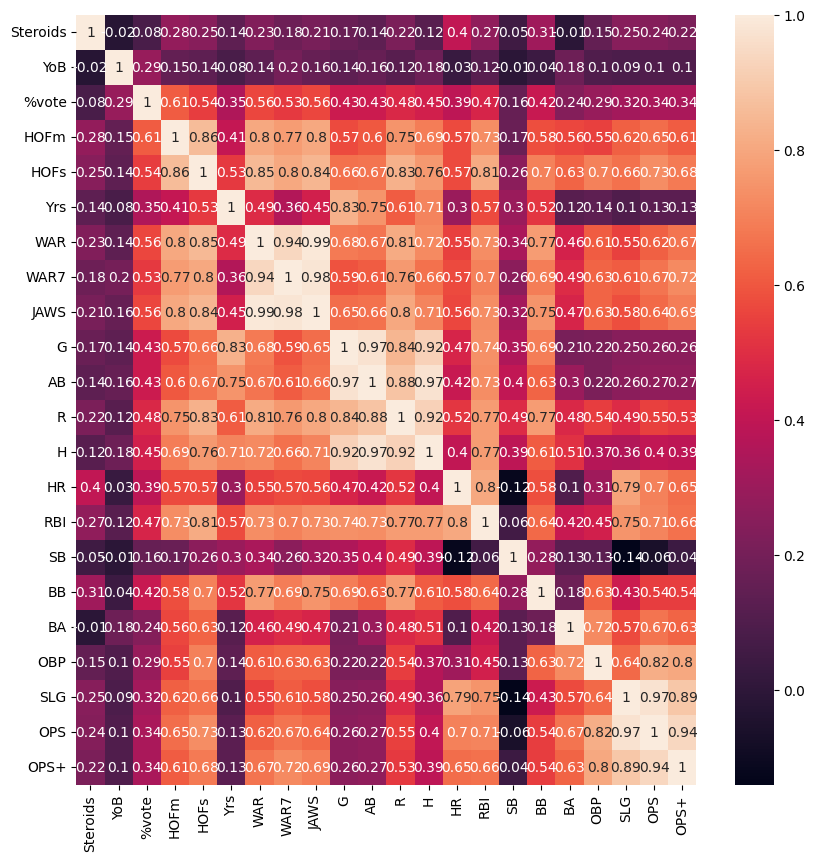

In [4]:
correlation_matrix = batter_data.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True, ax = ax)

Notice the extremely strong correlations between:
    - JAWS, WAR, WAR7. We will keep JAWS
    - SLG, OPS, OPS+. We will keep OPS+
    - AB and H. We will keep H

In [5]:
batter_data = batter_data.drop(['WAR', 'WAR7', 'SLG', 'OPS', 'AB'], axis=1)
batter_data

,Steroids,YoB,%vote,HOFm,HOFs,Yrs,JAWS,G,R,H,HR,RBI,SB,BB,BA,OBP,OPS+
0,0,6,0.760,99,40,17,56.9,2038,1211,2077,316,1287,118,899,0.281,0.364,122
1,0,5,0.720,175,59,17,54.2,2247,1401,2519,369,1406,37,1335,0.316,0.414,133
2,0,6,0.580,109,34,17,54.6,2196,1204,1933,434,1289,152,891,0.254,0.337,111
3,1,9,0.550,158,61,22,49.3,2576,1636,2689,509,1676,253,1475,0.292,0.393,140
4,0,1,0.470,126,52,20,57.3,2586,1582,2725,435,1587,312,1084,0.279,0.350,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,0,2,0.005,11,20,16,8.5,1147,363,777,21,378,98,170,0.213,0.254,63
2653,0,1,0.005,40,15,15,21.7,1806,906,1766,92,793,233,545,0.270,0.332,114
2654,0,1,0.005,11,15,15,22.9,1716,868,1613,42,577,293,715,0.268,0.350,108
2655,0,1,0.005,22,13,14,9.9,1447,665,1516,42,567,37,250,0.280,0.317,82


<Axes: >

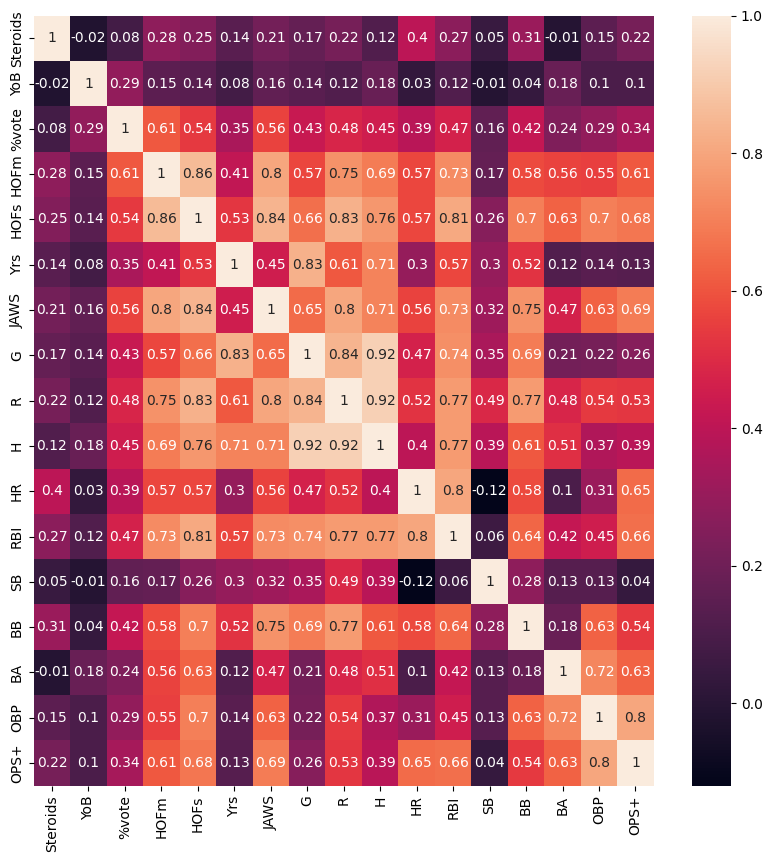

In [6]:
correlation_matrix = batter_data.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True, ax = ax)

There's still high correlation between hits and runs and games, but we want to keep all of those.

In [7]:
batterX = batter_data.drop(['%vote'], axis = 1)
batterY = batter_data.iloc[:, 2]

batterX;

In [8]:
batterX_train, batterX_test, batterY_train, batterY_test = train_test_split(batterX, batterY, test_size = 0.3, random_state=420)

In [10]:
xgb_model = xgb.XGBRegressor(n_jobs=1)

In [25]:
bat = GridSearchCV(xgb_model,
                   {'max_depth': [7,8],
                    'n_estimators': [100, 150],
                    'learning_rate': [0.1, 0.2, 0.3],
                    'alpha': [1,2]}, verbose=1, n_jobs=1, cv=5)

In [26]:
bat.fit(batterX_train, batterY_train, eval_set=[(batterX_test, batterY_test)])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[0]	validation_0-rmse:0.20904
[1]	validation_0-rmse:0.19948
[2]	validation_0-rmse:0.19115
[3]	validation_0-rmse:0.18350
[4]	validation_0-rmse:0.17698
[5]	validation_0-rmse:0.17220
[6]	validation_0-rmse:0.16680
[7]	validation_0-rmse:0.16275
[8]	validation_0-rmse:0.15874
[9]	validation_0-rmse:0.15574
[10]	validation_0-rmse:0.15267
[11]	validation_0-rmse:0.14973
[12]	validation_0-rmse:0.14732
[13]	validation_0-rmse:0.14491
[14]	validation_0-rmse:0.14281
[15]	validation_0-rmse:0.14087
[16]	validation_0-rmse:0.13863
[17]	validation_0-rmse:0.13731


/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[18]	validation_0-rmse:0.13570
[19]	validation_0-rmse:0.13398
[20]	validation_0-rmse:0.13282
[21]	validation_0-rmse:0.13163
[22]	validation_0-rmse:0.13101
[23]	validation_0-rmse:0.12999
[24]	validation_0-rmse:0.12895
[25]	validation_0-rmse:0.12791
[26]	validation_0-rmse:0.12718
[27]	validation_0-rmse:0.12653
[28]	validation_0-rmse:0.12579
[29]	validation_0-rmse:0.12506
[30]	validation_0-rmse:0.12446
[31]	validation_0-rmse:0.12405
[32]	validation_0-rmse:0.12358
[33]	validation_0-rmse:0.12324
[34]	validation_0-rmse:0.12270
[35]	validation_0-rmse:0.12212
[36]	validation_0-rmse:0.12177
[37]	validation_0-rmse:0.12147
[38]	validation_0-rmse:0.12114
[39]	validation_0-rmse:0.12078
[40]	validation_0-rmse:0.12031
[41]	validation_0-rmse:0.11997
[42]	validation_0-rmse:0.11955
[43]	validation_0-rmse:0.11933
[44]	validation_0-rmse:0.11902
[45]	validation_0-rmse:0.11875
[46]	validation_0-rmse:0.11847
[47]	validation_0-rmse:0.11821
[48]	validation_0-rmse:0.11787
[49]	validation_0-rmse:0.11778
[50]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[29]	validation_0-rmse:0.11952
[30]	validation_0-rmse:0.11895
[31]	validation_0-rmse:0.11831
[32]	validation_0-rmse:0.11780
[33]	validation_0-rmse:0.11746
[34]	validation_0-rmse:0.11703
[35]	validation_0-rmse:0.11643
[36]	validation_0-rmse:0.11604
[37]	validation_0-rmse:0.11577
[38]	validation_0-rmse:0.11538
[39]	validation_0-rmse:0.11514
[40]	validation_0-rmse:0.11496
[41]	validation_0-rmse:0.11473
[42]	validation_0-rmse:0.11436
[43]	validation_0-rmse:0.11422
[44]	validation_0-rmse:0.11404
[45]	validation_0-rmse:0.11385
[46]	validation_0-rmse:0.11378
[47]	validation_0-rmse:0.11360
[48]	validation_0-rmse:0.11342
[49]	validation_0-rmse:0.11318
[50]	validation_0-rmse:0.11302
[51]	validation_0-rmse:0.11291
[52]	validation_0-rmse:0.11270
[53]	validation_0-rmse:0.11263
[54]	validation_0-rmse:0.11246
[55]	validation_0-rmse:0.11229
[56]	validation_0-rmse:0.11211
[57]	validation_0-rmse:0.11200
[58]	validation_0-rmse:0.11190
[59]	validation_0-rmse:0.11173
[60]	validation_0-rmse:0.11158
[61]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[20]	validation_0-rmse:0.13309
[21]	validation_0-rmse:0.13235
[22]	validation_0-rmse:0.13156
[23]	validation_0-rmse:0.13078
[24]	validation_0-rmse:0.13008
[25]	validation_0-rmse:0.12887
[26]	validation_0-rmse:0.12850
[27]	validation_0-rmse:0.12807
[28]	validation_0-rmse:0.12767
[29]	validation_0-rmse:0.12727
[30]	validation_0-rmse:0.12683
[31]	validation_0-rmse:0.12636
[32]	validation_0-rmse:0.12596
[33]	validation_0-rmse:0.12558
[34]	validation_0-rmse:0.12504
[35]	validation_0-rmse:0.12456
[36]	validation_0-rmse:0.12431
[37]	validation_0-rmse:0.12387
[38]	validation_0-rmse:0.12349
[39]	validation_0-rmse:0.12322
[40]	validation_0-rmse:0.12288
[41]	validation_0-rmse:0.12277
[42]	validation_0-rmse:0.12246
[43]	validation_0-rmse:0.12222
[44]	validation_0-rmse:0.12195
[45]	validation_0-rmse:0.12179
[46]	validation_0-rmse:0.12162
[47]	validation_0-rmse:0.12148
[48]	validation_0-rmse:0.12125
[49]	validation_0-rmse:0.12102
[50]	validation_0-rmse:0.12092
[51]	validation_0-rmse:0.12076
[52]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[28]	validation_0-rmse:0.11993
[29]	validation_0-rmse:0.11932
[30]	validation_0-rmse:0.11862
[31]	validation_0-rmse:0.11794
[32]	validation_0-rmse:0.11748
[33]	validation_0-rmse:0.11702
[34]	validation_0-rmse:0.11671
[35]	validation_0-rmse:0.11617
[36]	validation_0-rmse:0.11574
[37]	validation_0-rmse:0.11548
[38]	validation_0-rmse:0.11508
[39]	validation_0-rmse:0.11484
[40]	validation_0-rmse:0.11456
[41]	validation_0-rmse:0.11415
[42]	validation_0-rmse:0.11383
[43]	validation_0-rmse:0.11351
[44]	validation_0-rmse:0.11327
[45]	validation_0-rmse:0.11297
[46]	validation_0-rmse:0.11279
[47]	validation_0-rmse:0.11257
[48]	validation_0-rmse:0.11233
[49]	validation_0-rmse:0.11213
[50]	validation_0-rmse:0.11199
[51]	validation_0-rmse:0.11179
[52]	validation_0-rmse:0.11165
[53]	validation_0-rmse:0.11144
[54]	validation_0-rmse:0.11125
[55]	validation_0-rmse:0.11114
[56]	validation_0-rmse:0.11097
[57]	validation_0-rmse:0.11064
[58]	validation_0-rmse:0.11051
[59]	validation_0-rmse:0.11037
[60]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[22]	validation_0-rmse:0.12906
[23]	validation_0-rmse:0.12804
[24]	validation_0-rmse:0.12732
[25]	validation_0-rmse:0.12687
[26]	validation_0-rmse:0.12617
[27]	validation_0-rmse:0.12595
[28]	validation_0-rmse:0.12519
[29]	validation_0-rmse:0.12482
[30]	validation_0-rmse:0.12425
[31]	validation_0-rmse:0.12350
[32]	validation_0-rmse:0.12308
[33]	validation_0-rmse:0.12265
[34]	validation_0-rmse:0.12222
[35]	validation_0-rmse:0.12175
[36]	validation_0-rmse:0.12123
[37]	validation_0-rmse:0.12087
[38]	validation_0-rmse:0.12057
[39]	validation_0-rmse:0.12052
[40]	validation_0-rmse:0.12016
[41]	validation_0-rmse:0.11983
[42]	validation_0-rmse:0.11958
[43]	validation_0-rmse:0.11939
[44]	validation_0-rmse:0.11926
[45]	validation_0-rmse:0.11904
[46]	validation_0-rmse:0.11887
[47]	validation_0-rmse:0.11869
[48]	validation_0-rmse:0.11845
[49]	validation_0-rmse:0.11830
[50]	validation_0-rmse:0.11821
[51]	validation_0-rmse:0.11803
[52]	validation_0-rmse:0.11780
[53]	validation_0-rmse:0.11759
[54]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[27]	validation_0-rmse:0.12653
[28]	validation_0-rmse:0.12579
[29]	validation_0-rmse:0.12506
[30]	validation_0-rmse:0.12446
[31]	validation_0-rmse:0.12405
[32]	validation_0-rmse:0.12358
[33]	validation_0-rmse:0.12324
[34]	validation_0-rmse:0.12270
[35]	validation_0-rmse:0.12212
[36]	validation_0-rmse:0.12177
[37]	validation_0-rmse:0.12147
[38]	validation_0-rmse:0.12114
[39]	validation_0-rmse:0.12078
[40]	validation_0-rmse:0.12031
[41]	validation_0-rmse:0.11997
[42]	validation_0-rmse:0.11955
[43]	validation_0-rmse:0.11933
[44]	validation_0-rmse:0.11902
[45]	validation_0-rmse:0.11875
[46]	validation_0-rmse:0.11847
[47]	validation_0-rmse:0.11821
[48]	validation_0-rmse:0.11787
[49]	validation_0-rmse:0.11778
[50]	validation_0-rmse:0.11749
[51]	validation_0-rmse:0.11721
[52]	validation_0-rmse:0.11699
[53]	validation_0-rmse:0.11679
[54]	validation_0-rmse:0.11647
[55]	validation_0-rmse:0.11639
[56]	validation_0-rmse:0.11625
[57]	validation_0-rmse:0.11608
[58]	validation_0-rmse:0.11597
[59]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[10]	validation_0-rmse:0.14951
[11]	validation_0-rmse:0.14560
[12]	validation_0-rmse:0.14248
[13]	validation_0-rmse:0.13934
[14]	validation_0-rmse:0.13688
[15]	validation_0-rmse:0.13464
[16]	validation_0-rmse:0.13281
[17]	validation_0-rmse:0.13080
[18]	validation_0-rmse:0.12963
[19]	validation_0-rmse:0.12836
[20]	validation_0-rmse:0.12696
[21]	validation_0-rmse:0.12595
[22]	validation_0-rmse:0.12489
[23]	validation_0-rmse:0.12406
[24]	validation_0-rmse:0.12321
[25]	validation_0-rmse:0.12251
[26]	validation_0-rmse:0.12189
[27]	validation_0-rmse:0.12113
[28]	validation_0-rmse:0.12039
[29]	validation_0-rmse:0.11952
[30]	validation_0-rmse:0.11895
[31]	validation_0-rmse:0.11831
[32]	validation_0-rmse:0.11780
[33]	validation_0-rmse:0.11746
[34]	validation_0-rmse:0.11703
[35]	validation_0-rmse:0.11643
[36]	validation_0-rmse:0.11604
[37]	validation_0-rmse:0.11577
[38]	validation_0-rmse:0.11538
[39]	validation_0-rmse:0.11514
[40]	validation_0-rmse:0.11496
[41]	validation_0-rmse:0.11473
[42]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[27]	validation_0-rmse:0.12807
[28]	validation_0-rmse:0.12767
[29]	validation_0-rmse:0.12727
[30]	validation_0-rmse:0.12683
[31]	validation_0-rmse:0.12636
[32]	validation_0-rmse:0.12596
[33]	validation_0-rmse:0.12558
[34]	validation_0-rmse:0.12504
[35]	validation_0-rmse:0.12456
[36]	validation_0-rmse:0.12431
[37]	validation_0-rmse:0.12387
[38]	validation_0-rmse:0.12349
[39]	validation_0-rmse:0.12322
[40]	validation_0-rmse:0.12288
[41]	validation_0-rmse:0.12277
[42]	validation_0-rmse:0.12246
[43]	validation_0-rmse:0.12222
[44]	validation_0-rmse:0.12195
[45]	validation_0-rmse:0.12179
[46]	validation_0-rmse:0.12162
[47]	validation_0-rmse:0.12148
[48]	validation_0-rmse:0.12125
[49]	validation_0-rmse:0.12102
[50]	validation_0-rmse:0.12092
[51]	validation_0-rmse:0.12076
[52]	validation_0-rmse:0.12049
[53]	validation_0-rmse:0.12033
[54]	validation_0-rmse:0.12012
[55]	validation_0-rmse:0.12000
[56]	validation_0-rmse:0.11995
[57]	validation_0-rmse:0.11980
[58]	validation_0-rmse:0.11958
[59]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[22]	validation_0-rmse:0.12449
[23]	validation_0-rmse:0.12372
[24]	validation_0-rmse:0.12262
[25]	validation_0-rmse:0.12177
[26]	validation_0-rmse:0.12102
[27]	validation_0-rmse:0.12049
[28]	validation_0-rmse:0.11993
[29]	validation_0-rmse:0.11932
[30]	validation_0-rmse:0.11862
[31]	validation_0-rmse:0.11794
[32]	validation_0-rmse:0.11748
[33]	validation_0-rmse:0.11702
[34]	validation_0-rmse:0.11671
[35]	validation_0-rmse:0.11617
[36]	validation_0-rmse:0.11574
[37]	validation_0-rmse:0.11548
[38]	validation_0-rmse:0.11508
[39]	validation_0-rmse:0.11484
[40]	validation_0-rmse:0.11456
[41]	validation_0-rmse:0.11415
[42]	validation_0-rmse:0.11383
[43]	validation_0-rmse:0.11351
[44]	validation_0-rmse:0.11327
[45]	validation_0-rmse:0.11297
[46]	validation_0-rmse:0.11279
[47]	validation_0-rmse:0.11257
[48]	validation_0-rmse:0.11233
[49]	validation_0-rmse:0.11213
[50]	validation_0-rmse:0.11199
[51]	validation_0-rmse:0.11179
[52]	validation_0-rmse:0.11165
[53]	validation_0-rmse:0.11144
[54]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[20]	validation_0-rmse:0.13100
[21]	validation_0-rmse:0.13034
[22]	validation_0-rmse:0.12906
[23]	validation_0-rmse:0.12804
[24]	validation_0-rmse:0.12732
[25]	validation_0-rmse:0.12687
[26]	validation_0-rmse:0.12617
[27]	validation_0-rmse:0.12595
[28]	validation_0-rmse:0.12519
[29]	validation_0-rmse:0.12482
[30]	validation_0-rmse:0.12425
[31]	validation_0-rmse:0.12350
[32]	validation_0-rmse:0.12308
[33]	validation_0-rmse:0.12265
[34]	validation_0-rmse:0.12222
[35]	validation_0-rmse:0.12175
[36]	validation_0-rmse:0.12123
[37]	validation_0-rmse:0.12087
[38]	validation_0-rmse:0.12057
[39]	validation_0-rmse:0.12052
[40]	validation_0-rmse:0.12016
[41]	validation_0-rmse:0.11983
[42]	validation_0-rmse:0.11958
[43]	validation_0-rmse:0.11939
[44]	validation_0-rmse:0.11926
[45]	validation_0-rmse:0.11904
[46]	validation_0-rmse:0.11887
[47]	validation_0-rmse:0.11869
[48]	validation_0-rmse:0.11845
[49]	validation_0-rmse:0.11830
[50]	validation_0-rmse:0.11821
[51]	validation_0-rmse:0.11803
[52]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[21]	validation_0-rmse:0.13104
[22]	validation_0-rmse:0.13034
[23]	validation_0-rmse:0.12960
[24]	validation_0-rmse:0.12892
[25]	validation_0-rmse:0.12827
[26]	validation_0-rmse:0.12767
[27]	validation_0-rmse:0.12699
[28]	validation_0-rmse:0.12641
[29]	validation_0-rmse:0.12583
[30]	validation_0-rmse:0.12536
[31]	validation_0-rmse:0.12468
[32]	validation_0-rmse:0.12422
[33]	validation_0-rmse:0.12392
[34]	validation_0-rmse:0.12348
[35]	validation_0-rmse:0.12306
[36]	validation_0-rmse:0.12251
[37]	validation_0-rmse:0.12211
[38]	validation_0-rmse:0.12173
[39]	validation_0-rmse:0.12124
[40]	validation_0-rmse:0.12095
[41]	validation_0-rmse:0.12067
[42]	validation_0-rmse:0.12036
[43]	validation_0-rmse:0.12009
[44]	validation_0-rmse:0.11993
[45]	validation_0-rmse:0.11979
[46]	validation_0-rmse:0.11954
[47]	validation_0-rmse:0.11939
[48]	validation_0-rmse:0.11902
[49]	validation_0-rmse:0.11886
[50]	validation_0-rmse:0.11870
[51]	validation_0-rmse:0.11853
[52]	validation_0-rmse:0.11843
[53]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[19]	validation_0-rmse:0.12925
[20]	validation_0-rmse:0.12804
[21]	validation_0-rmse:0.12648
[22]	validation_0-rmse:0.12543
[23]	validation_0-rmse:0.12453
[24]	validation_0-rmse:0.12354
[25]	validation_0-rmse:0.12266
[26]	validation_0-rmse:0.12191
[27]	validation_0-rmse:0.12129
[28]	validation_0-rmse:0.12066
[29]	validation_0-rmse:0.11996
[30]	validation_0-rmse:0.11928
[31]	validation_0-rmse:0.11879
[32]	validation_0-rmse:0.11844
[33]	validation_0-rmse:0.11807
[34]	validation_0-rmse:0.11743
[35]	validation_0-rmse:0.11719
[36]	validation_0-rmse:0.11678
[37]	validation_0-rmse:0.11638
[38]	validation_0-rmse:0.11620
[39]	validation_0-rmse:0.11579
[40]	validation_0-rmse:0.11552
[41]	validation_0-rmse:0.11538
[42]	validation_0-rmse:0.11511
[43]	validation_0-rmse:0.11491
[44]	validation_0-rmse:0.11458
[45]	validation_0-rmse:0.11433
[46]	validation_0-rmse:0.11407
[47]	validation_0-rmse:0.11388
[48]	validation_0-rmse:0.11369
[49]	validation_0-rmse:0.11356
[50]	validation_0-rmse:0.11332
[51]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[22]	validation_0-rmse:0.13104
[23]	validation_0-rmse:0.13036
[24]	validation_0-rmse:0.12927
[25]	validation_0-rmse:0.12865
[26]	validation_0-rmse:0.12812
[27]	validation_0-rmse:0.12767
[28]	validation_0-rmse:0.12706
[29]	validation_0-rmse:0.12660
[30]	validation_0-rmse:0.12622
[31]	validation_0-rmse:0.12582
[32]	validation_0-rmse:0.12543
[33]	validation_0-rmse:0.12508
[34]	validation_0-rmse:0.12469
[35]	validation_0-rmse:0.12438
[36]	validation_0-rmse:0.12403
[37]	validation_0-rmse:0.12383
[38]	validation_0-rmse:0.12359
[39]	validation_0-rmse:0.12351
[40]	validation_0-rmse:0.12321
[41]	validation_0-rmse:0.12297
[42]	validation_0-rmse:0.12259
[43]	validation_0-rmse:0.12231
[44]	validation_0-rmse:0.12207
[45]	validation_0-rmse:0.12183
[46]	validation_0-rmse:0.12158
[47]	validation_0-rmse:0.12133
[48]	validation_0-rmse:0.12112
[49]	validation_0-rmse:0.12103
[50]	validation_0-rmse:0.12083
[51]	validation_0-rmse:0.12057
[52]	validation_0-rmse:0.12030
[53]	validation_0-rmse:0.12010
[54]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[24]	validation_0-rmse:0.12208
[25]	validation_0-rmse:0.12139
[26]	validation_0-rmse:0.12061
[27]	validation_0-rmse:0.11999
[28]	validation_0-rmse:0.11933
[29]	validation_0-rmse:0.11871
[30]	validation_0-rmse:0.11812
[31]	validation_0-rmse:0.11756
[32]	validation_0-rmse:0.11699
[33]	validation_0-rmse:0.11663
[34]	validation_0-rmse:0.11631
[35]	validation_0-rmse:0.11594
[36]	validation_0-rmse:0.11555
[37]	validation_0-rmse:0.11523
[38]	validation_0-rmse:0.11489
[39]	validation_0-rmse:0.11454
[40]	validation_0-rmse:0.11422
[41]	validation_0-rmse:0.11402
[42]	validation_0-rmse:0.11373
[43]	validation_0-rmse:0.11346
[44]	validation_0-rmse:0.11316
[45]	validation_0-rmse:0.11281
[46]	validation_0-rmse:0.11252
[47]	validation_0-rmse:0.11230
[48]	validation_0-rmse:0.11206
[49]	validation_0-rmse:0.11183
[50]	validation_0-rmse:0.11163
[51]	validation_0-rmse:0.11150
[52]	validation_0-rmse:0.11142
[53]	validation_0-rmse:0.11125
[54]	validation_0-rmse:0.11114
[55]	validation_0-rmse:0.11096
[56]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[23]	validation_0-rmse:0.12690
[24]	validation_0-rmse:0.12638
[25]	validation_0-rmse:0.12583
[26]	validation_0-rmse:0.12519
[27]	validation_0-rmse:0.12472
[28]	validation_0-rmse:0.12439
[29]	validation_0-rmse:0.12382
[30]	validation_0-rmse:0.12352
[31]	validation_0-rmse:0.12287
[32]	validation_0-rmse:0.12249
[33]	validation_0-rmse:0.12206
[34]	validation_0-rmse:0.12177
[35]	validation_0-rmse:0.12142
[36]	validation_0-rmse:0.12126
[37]	validation_0-rmse:0.12096
[38]	validation_0-rmse:0.12069
[39]	validation_0-rmse:0.12022
[40]	validation_0-rmse:0.11984
[41]	validation_0-rmse:0.11965
[42]	validation_0-rmse:0.11937
[43]	validation_0-rmse:0.11908
[44]	validation_0-rmse:0.11869
[45]	validation_0-rmse:0.11855
[46]	validation_0-rmse:0.11833
[47]	validation_0-rmse:0.11813
[48]	validation_0-rmse:0.11795
[49]	validation_0-rmse:0.11780
[50]	validation_0-rmse:0.11776
[51]	validation_0-rmse:0.11756
[52]	validation_0-rmse:0.11746
[53]	validation_0-rmse:0.11720
[54]	validation_0-rmse:0.11704
[55]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[23]	validation_0-rmse:0.12960
[24]	validation_0-rmse:0.12892
[25]	validation_0-rmse:0.12827
[26]	validation_0-rmse:0.12767
[27]	validation_0-rmse:0.12699
[28]	validation_0-rmse:0.12641
[29]	validation_0-rmse:0.12583
[30]	validation_0-rmse:0.12536
[31]	validation_0-rmse:0.12468
[32]	validation_0-rmse:0.12422
[33]	validation_0-rmse:0.12392
[34]	validation_0-rmse:0.12348
[35]	validation_0-rmse:0.12306
[36]	validation_0-rmse:0.12251
[37]	validation_0-rmse:0.12211
[38]	validation_0-rmse:0.12173
[39]	validation_0-rmse:0.12124
[40]	validation_0-rmse:0.12095
[41]	validation_0-rmse:0.12067
[42]	validation_0-rmse:0.12036
[43]	validation_0-rmse:0.12009
[44]	validation_0-rmse:0.11993
[45]	validation_0-rmse:0.11979
[46]	validation_0-rmse:0.11954
[47]	validation_0-rmse:0.11939
[48]	validation_0-rmse:0.11902
[49]	validation_0-rmse:0.11886
[50]	validation_0-rmse:0.11870
[51]	validation_0-rmse:0.11853
[52]	validation_0-rmse:0.11843
[53]	validation_0-rmse:0.11829
[54]	validation_0-rmse:0.11799
[55]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[22]	validation_0-rmse:0.12543
[23]	validation_0-rmse:0.12453
[24]	validation_0-rmse:0.12354
[25]	validation_0-rmse:0.12266
[26]	validation_0-rmse:0.12191
[27]	validation_0-rmse:0.12129
[28]	validation_0-rmse:0.12066
[29]	validation_0-rmse:0.11996
[30]	validation_0-rmse:0.11928
[31]	validation_0-rmse:0.11879
[32]	validation_0-rmse:0.11844
[33]	validation_0-rmse:0.11807
[34]	validation_0-rmse:0.11743
[35]	validation_0-rmse:0.11719
[36]	validation_0-rmse:0.11678
[37]	validation_0-rmse:0.11638
[38]	validation_0-rmse:0.11620
[39]	validation_0-rmse:0.11579
[40]	validation_0-rmse:0.11552
[41]	validation_0-rmse:0.11538
[42]	validation_0-rmse:0.11511
[43]	validation_0-rmse:0.11491
[44]	validation_0-rmse:0.11458
[45]	validation_0-rmse:0.11433
[46]	validation_0-rmse:0.11407
[47]	validation_0-rmse:0.11388
[48]	validation_0-rmse:0.11369
[49]	validation_0-rmse:0.11356
[50]	validation_0-rmse:0.11332
[51]	validation_0-rmse:0.11315
[52]	validation_0-rmse:0.11307
[53]	validation_0-rmse:0.11304
[54]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[22]	validation_0-rmse:0.13104
[23]	validation_0-rmse:0.13036
[24]	validation_0-rmse:0.12927
[25]	validation_0-rmse:0.12865
[26]	validation_0-rmse:0.12812
[27]	validation_0-rmse:0.12767
[28]	validation_0-rmse:0.12706
[29]	validation_0-rmse:0.12660
[30]	validation_0-rmse:0.12622
[31]	validation_0-rmse:0.12582
[32]	validation_0-rmse:0.12543
[33]	validation_0-rmse:0.12508
[34]	validation_0-rmse:0.12469
[35]	validation_0-rmse:0.12438
[36]	validation_0-rmse:0.12403
[37]	validation_0-rmse:0.12383
[38]	validation_0-rmse:0.12359
[39]	validation_0-rmse:0.12351
[40]	validation_0-rmse:0.12321
[41]	validation_0-rmse:0.12297
[42]	validation_0-rmse:0.12259
[43]	validation_0-rmse:0.12231
[44]	validation_0-rmse:0.12207
[45]	validation_0-rmse:0.12183
[46]	validation_0-rmse:0.12158
[47]	validation_0-rmse:0.12133
[48]	validation_0-rmse:0.12112
[49]	validation_0-rmse:0.12103
[50]	validation_0-rmse:0.12083
[51]	validation_0-rmse:0.12057
[52]	validation_0-rmse:0.12030
[53]	validation_0-rmse:0.12010
[54]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[23]	validation_0-rmse:0.12309
[24]	validation_0-rmse:0.12208
[25]	validation_0-rmse:0.12139
[26]	validation_0-rmse:0.12061
[27]	validation_0-rmse:0.11999
[28]	validation_0-rmse:0.11933
[29]	validation_0-rmse:0.11871
[30]	validation_0-rmse:0.11812
[31]	validation_0-rmse:0.11756
[32]	validation_0-rmse:0.11699
[33]	validation_0-rmse:0.11663
[34]	validation_0-rmse:0.11631
[35]	validation_0-rmse:0.11594
[36]	validation_0-rmse:0.11555
[37]	validation_0-rmse:0.11523
[38]	validation_0-rmse:0.11489
[39]	validation_0-rmse:0.11454
[40]	validation_0-rmse:0.11422
[41]	validation_0-rmse:0.11402
[42]	validation_0-rmse:0.11373
[43]	validation_0-rmse:0.11346
[44]	validation_0-rmse:0.11316
[45]	validation_0-rmse:0.11281
[46]	validation_0-rmse:0.11252
[47]	validation_0-rmse:0.11230
[48]	validation_0-rmse:0.11206
[49]	validation_0-rmse:0.11183
[50]	validation_0-rmse:0.11163
[51]	validation_0-rmse:0.11150
[52]	validation_0-rmse:0.11142
[53]	validation_0-rmse:0.11125
[54]	validation_0-rmse:0.11114
[55]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[22]	validation_0-rmse:0.12748
[23]	validation_0-rmse:0.12690
[24]	validation_0-rmse:0.12638
[25]	validation_0-rmse:0.12583
[26]	validation_0-rmse:0.12519
[27]	validation_0-rmse:0.12472
[28]	validation_0-rmse:0.12439
[29]	validation_0-rmse:0.12382
[30]	validation_0-rmse:0.12352
[31]	validation_0-rmse:0.12287
[32]	validation_0-rmse:0.12249
[33]	validation_0-rmse:0.12206
[34]	validation_0-rmse:0.12177
[35]	validation_0-rmse:0.12142
[36]	validation_0-rmse:0.12126
[37]	validation_0-rmse:0.12096
[38]	validation_0-rmse:0.12069
[39]	validation_0-rmse:0.12022
[40]	validation_0-rmse:0.11984
[41]	validation_0-rmse:0.11965
[42]	validation_0-rmse:0.11937
[43]	validation_0-rmse:0.11908
[44]	validation_0-rmse:0.11869
[45]	validation_0-rmse:0.11855
[46]	validation_0-rmse:0.11833
[47]	validation_0-rmse:0.11813
[48]	validation_0-rmse:0.11795
[49]	validation_0-rmse:0.11780
[50]	validation_0-rmse:0.11776
[51]	validation_0-rmse:0.11756
[52]	validation_0-rmse:0.11746
[53]	validation_0-rmse:0.11720
[54]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[22]	validation_0-rmse:0.11985
[23]	validation_0-rmse:0.11935
[24]	validation_0-rmse:0.11875
[25]	validation_0-rmse:0.11856
[26]	validation_0-rmse:0.11823
[27]	validation_0-rmse:0.11780
[28]	validation_0-rmse:0.11745
[29]	validation_0-rmse:0.11725
[30]	validation_0-rmse:0.11707
[31]	validation_0-rmse:0.11669
[32]	validation_0-rmse:0.11651
[33]	validation_0-rmse:0.11624
[34]	validation_0-rmse:0.11603
[35]	validation_0-rmse:0.11596
[36]	validation_0-rmse:0.11575
[37]	validation_0-rmse:0.11561
[38]	validation_0-rmse:0.11550
[39]	validation_0-rmse:0.11531
[40]	validation_0-rmse:0.11522
[41]	validation_0-rmse:0.11509
[42]	validation_0-rmse:0.11496
[43]	validation_0-rmse:0.11487
[44]	validation_0-rmse:0.11480
[45]	validation_0-rmse:0.11480
[46]	validation_0-rmse:0.11469
[47]	validation_0-rmse:0.11460
[48]	validation_0-rmse:0.11459
[49]	validation_0-rmse:0.11438
[50]	validation_0-rmse:0.11439
[51]	validation_0-rmse:0.11436
[52]	validation_0-rmse:0.11429
[53]	validation_0-rmse:0.11420
[54]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[14]	validation_0-rmse:0.11966
[15]	validation_0-rmse:0.11873
[16]	validation_0-rmse:0.11800
[17]	validation_0-rmse:0.11698
[18]	validation_0-rmse:0.11607
[19]	validation_0-rmse:0.11561
[20]	validation_0-rmse:0.11487
[21]	validation_0-rmse:0.11452
[22]	validation_0-rmse:0.11381
[23]	validation_0-rmse:0.11343
[24]	validation_0-rmse:0.11277
[25]	validation_0-rmse:0.11217
[26]	validation_0-rmse:0.11191
[27]	validation_0-rmse:0.11146
[28]	validation_0-rmse:0.11087
[29]	validation_0-rmse:0.11077
[30]	validation_0-rmse:0.11042
[31]	validation_0-rmse:0.11005
[32]	validation_0-rmse:0.10978
[33]	validation_0-rmse:0.10964
[34]	validation_0-rmse:0.10961
[35]	validation_0-rmse:0.10945
[36]	validation_0-rmse:0.10928
[37]	validation_0-rmse:0.10907
[38]	validation_0-rmse:0.10882
[39]	validation_0-rmse:0.10864
[40]	validation_0-rmse:0.10825
[41]	validation_0-rmse:0.10829
[42]	validation_0-rmse:0.10816
[43]	validation_0-rmse:0.10792
[44]	validation_0-rmse:0.10783
[45]	validation_0-rmse:0.10774
[46]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[24]	validation_0-rmse:0.12070
[25]	validation_0-rmse:0.12058
[26]	validation_0-rmse:0.12025
[27]	validation_0-rmse:0.11968
[28]	validation_0-rmse:0.11936
[29]	validation_0-rmse:0.11903
[30]	validation_0-rmse:0.11879
[31]	validation_0-rmse:0.11856
[32]	validation_0-rmse:0.11821
[33]	validation_0-rmse:0.11810
[34]	validation_0-rmse:0.11797
[35]	validation_0-rmse:0.11787
[36]	validation_0-rmse:0.11766
[37]	validation_0-rmse:0.11705
[38]	validation_0-rmse:0.11714
[39]	validation_0-rmse:0.11696
[40]	validation_0-rmse:0.11680
[41]	validation_0-rmse:0.11658
[42]	validation_0-rmse:0.11647
[43]	validation_0-rmse:0.11648
[44]	validation_0-rmse:0.11636
[45]	validation_0-rmse:0.11627
[46]	validation_0-rmse:0.11613
[47]	validation_0-rmse:0.11590
[48]	validation_0-rmse:0.11578
[49]	validation_0-rmse:0.11571
[50]	validation_0-rmse:0.11559
[51]	validation_0-rmse:0.11554
[52]	validation_0-rmse:0.11546
[53]	validation_0-rmse:0.11540
[54]	validation_0-rmse:0.11537
[55]	validation_0-rmse:0.11534
[56]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[28]	validation_0-rmse:0.11411
[29]	validation_0-rmse:0.11396
[30]	validation_0-rmse:0.11354
[31]	validation_0-rmse:0.11356
[32]	validation_0-rmse:0.11326
[33]	validation_0-rmse:0.11299
[34]	validation_0-rmse:0.11289
[35]	validation_0-rmse:0.11262
[36]	validation_0-rmse:0.11244
[37]	validation_0-rmse:0.11220
[38]	validation_0-rmse:0.11207
[39]	validation_0-rmse:0.11184
[40]	validation_0-rmse:0.11163
[41]	validation_0-rmse:0.11133
[42]	validation_0-rmse:0.11121
[43]	validation_0-rmse:0.11099
[44]	validation_0-rmse:0.11092
[45]	validation_0-rmse:0.11076
[46]	validation_0-rmse:0.11045
[47]	validation_0-rmse:0.11045
[48]	validation_0-rmse:0.11034
[49]	validation_0-rmse:0.11010
[50]	validation_0-rmse:0.11003
[51]	validation_0-rmse:0.10998
[52]	validation_0-rmse:0.10983
[53]	validation_0-rmse:0.10982
[54]	validation_0-rmse:0.10969
[55]	validation_0-rmse:0.10969
[56]	validation_0-rmse:0.10969
[57]	validation_0-rmse:0.10969
[58]	validation_0-rmse:0.10969
[59]	validation_0-rmse:0.10969
[60]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[27]	validation_0-rmse:0.11655
[28]	validation_0-rmse:0.11628
[29]	validation_0-rmse:0.11603
[30]	validation_0-rmse:0.11575
[31]	validation_0-rmse:0.11535
[32]	validation_0-rmse:0.11509
[33]	validation_0-rmse:0.11508
[34]	validation_0-rmse:0.11528
[35]	validation_0-rmse:0.11513
[36]	validation_0-rmse:0.11525
[37]	validation_0-rmse:0.11515
[38]	validation_0-rmse:0.11478
[39]	validation_0-rmse:0.11475
[40]	validation_0-rmse:0.11457
[41]	validation_0-rmse:0.11452
[42]	validation_0-rmse:0.11441
[43]	validation_0-rmse:0.11438
[44]	validation_0-rmse:0.11436
[45]	validation_0-rmse:0.11434
[46]	validation_0-rmse:0.11433
[47]	validation_0-rmse:0.11431
[48]	validation_0-rmse:0.11428
[49]	validation_0-rmse:0.11415
[50]	validation_0-rmse:0.11416
[51]	validation_0-rmse:0.11412
[52]	validation_0-rmse:0.11394
[53]	validation_0-rmse:0.11394
[54]	validation_0-rmse:0.11394
[55]	validation_0-rmse:0.11392
[56]	validation_0-rmse:0.11389
[57]	validation_0-rmse:0.11389
[58]	validation_0-rmse:0.11389
[59]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[1]	validation_0-rmse:0.18309
[2]	validation_0-rmse:0.17237
[3]	validation_0-rmse:0.16266
[4]	validation_0-rmse:0.15590
[5]	validation_0-rmse:0.15062
[6]	validation_0-rmse:0.14578
[7]	validation_0-rmse:0.14121
[8]	validation_0-rmse:0.13734
[9]	validation_0-rmse:0.13448
[10]	validation_0-rmse:0.13228
[11]	validation_0-rmse:0.13025
[12]	validation_0-rmse:0.12893
[13]	validation_0-rmse:0.12773
[14]	validation_0-rmse:0.12621
[15]	validation_0-rmse:0.12521
[16]	validation_0-rmse:0.12439
[17]	validation_0-rmse:0.12319
[18]	validation_0-rmse:0.12250
[19]	validation_0-rmse:0.12187
[20]	validation_0-rmse:0.12130
[21]	validation_0-rmse:0.12070
[22]	validation_0-rmse:0.11985
[23]	validation_0-rmse:0.11935
[24]	validation_0-rmse:0.11875
[25]	validation_0-rmse:0.11856
[26]	validation_0-rmse:0.11823
[27]	validation_0-rmse:0.11780
[28]	validation_0-rmse:0.11745
[29]	validation_0-rmse:0.11725
[30]	validation_0-rmse:0.11707
[31]	validation_0-rmse:0.11669
[32]	validation_0-rmse:0.11651
[33]	validation_0

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[16]	validation_0-rmse:0.11800
[17]	validation_0-rmse:0.11698
[18]	validation_0-rmse:0.11607
[19]	validation_0-rmse:0.11561
[20]	validation_0-rmse:0.11487
[21]	validation_0-rmse:0.11452
[22]	validation_0-rmse:0.11381
[23]	validation_0-rmse:0.11343
[24]	validation_0-rmse:0.11277
[25]	validation_0-rmse:0.11217
[26]	validation_0-rmse:0.11191
[27]	validation_0-rmse:0.11146
[28]	validation_0-rmse:0.11087
[29]	validation_0-rmse:0.11077
[30]	validation_0-rmse:0.11042
[31]	validation_0-rmse:0.11005
[32]	validation_0-rmse:0.10978
[33]	validation_0-rmse:0.10964
[34]	validation_0-rmse:0.10961
[35]	validation_0-rmse:0.10945
[36]	validation_0-rmse:0.10928
[37]	validation_0-rmse:0.10907
[38]	validation_0-rmse:0.10882
[39]	validation_0-rmse:0.10864
[40]	validation_0-rmse:0.10825
[41]	validation_0-rmse:0.10829
[42]	validation_0-rmse:0.10816
[43]	validation_0-rmse:0.10792
[44]	validation_0-rmse:0.10783
[45]	validation_0-rmse:0.10774
[46]	validation_0-rmse:0.10768
[47]	validation_0-rmse:0.10758
[48]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[14]	validation_0-rmse:0.12686
[15]	validation_0-rmse:0.12580
[16]	validation_0-rmse:0.12472
[17]	validation_0-rmse:0.12380
[18]	validation_0-rmse:0.12309
[19]	validation_0-rmse:0.12266
[20]	validation_0-rmse:0.12244
[21]	validation_0-rmse:0.12189
[22]	validation_0-rmse:0.12143
[23]	validation_0-rmse:0.12117
[24]	validation_0-rmse:0.12070
[25]	validation_0-rmse:0.12058
[26]	validation_0-rmse:0.12025
[27]	validation_0-rmse:0.11968
[28]	validation_0-rmse:0.11936
[29]	validation_0-rmse:0.11903
[30]	validation_0-rmse:0.11879
[31]	validation_0-rmse:0.11856
[32]	validation_0-rmse:0.11821
[33]	validation_0-rmse:0.11810
[34]	validation_0-rmse:0.11797
[35]	validation_0-rmse:0.11787
[36]	validation_0-rmse:0.11766
[37]	validation_0-rmse:0.11705
[38]	validation_0-rmse:0.11714
[39]	validation_0-rmse:0.11696
[40]	validation_0-rmse:0.11680
[41]	validation_0-rmse:0.11658
[42]	validation_0-rmse:0.11647
[43]	validation_0-rmse:0.11648
[44]	validation_0-rmse:0.11636
[45]	validation_0-rmse:0.11627
[46]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[23]	validation_0-rmse:0.11612
[24]	validation_0-rmse:0.11552
[25]	validation_0-rmse:0.11516
[26]	validation_0-rmse:0.11481
[27]	validation_0-rmse:0.11442
[28]	validation_0-rmse:0.11411
[29]	validation_0-rmse:0.11396
[30]	validation_0-rmse:0.11354
[31]	validation_0-rmse:0.11356
[32]	validation_0-rmse:0.11326
[33]	validation_0-rmse:0.11299
[34]	validation_0-rmse:0.11289
[35]	validation_0-rmse:0.11262
[36]	validation_0-rmse:0.11244
[37]	validation_0-rmse:0.11220
[38]	validation_0-rmse:0.11207
[39]	validation_0-rmse:0.11184
[40]	validation_0-rmse:0.11163
[41]	validation_0-rmse:0.11133
[42]	validation_0-rmse:0.11121
[43]	validation_0-rmse:0.11099
[44]	validation_0-rmse:0.11092
[45]	validation_0-rmse:0.11076
[46]	validation_0-rmse:0.11045
[47]	validation_0-rmse:0.11045
[48]	validation_0-rmse:0.11034
[49]	validation_0-rmse:0.11010
[50]	validation_0-rmse:0.11003
[51]	validation_0-rmse:0.10998
[52]	validation_0-rmse:0.10983
[53]	validation_0-rmse:0.10982
[54]	validation_0-rmse:0.10969
[55]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[25]	validation_0-rmse:0.11687
[26]	validation_0-rmse:0.11667
[27]	validation_0-rmse:0.11655
[28]	validation_0-rmse:0.11628
[29]	validation_0-rmse:0.11603
[30]	validation_0-rmse:0.11575
[31]	validation_0-rmse:0.11535
[32]	validation_0-rmse:0.11509
[33]	validation_0-rmse:0.11508
[34]	validation_0-rmse:0.11528
[35]	validation_0-rmse:0.11513
[36]	validation_0-rmse:0.11525
[37]	validation_0-rmse:0.11515
[38]	validation_0-rmse:0.11478
[39]	validation_0-rmse:0.11475
[40]	validation_0-rmse:0.11457
[41]	validation_0-rmse:0.11452
[42]	validation_0-rmse:0.11441
[43]	validation_0-rmse:0.11438
[44]	validation_0-rmse:0.11436
[45]	validation_0-rmse:0.11434
[46]	validation_0-rmse:0.11433
[47]	validation_0-rmse:0.11431
[48]	validation_0-rmse:0.11428
[49]	validation_0-rmse:0.11415
[50]	validation_0-rmse:0.11416
[51]	validation_0-rmse:0.11412
[52]	validation_0-rmse:0.11394
[53]	validation_0-rmse:0.11394
[54]	validation_0-rmse:0.11394
[55]	validation_0-rmse:0.11392
[56]	validation_0-rmse:0.11389
[57]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[23]	validation_0-rmse:0.11855
[24]	validation_0-rmse:0.11834
[25]	validation_0-rmse:0.11791
[26]	validation_0-rmse:0.11755
[27]	validation_0-rmse:0.11733
[28]	validation_0-rmse:0.11701
[29]	validation_0-rmse:0.11682
[30]	validation_0-rmse:0.11642
[31]	validation_0-rmse:0.11631
[32]	validation_0-rmse:0.11619
[33]	validation_0-rmse:0.11610
[34]	validation_0-rmse:0.11599
[35]	validation_0-rmse:0.11584
[36]	validation_0-rmse:0.11571
[37]	validation_0-rmse:0.11554
[38]	validation_0-rmse:0.11525
[39]	validation_0-rmse:0.11517
[40]	validation_0-rmse:0.11517
[41]	validation_0-rmse:0.11497
[42]	validation_0-rmse:0.11486
[43]	validation_0-rmse:0.11473
[44]	validation_0-rmse:0.11472
[45]	validation_0-rmse:0.11462
[46]	validation_0-rmse:0.11451
[47]	validation_0-rmse:0.11448
[48]	validation_0-rmse:0.11434
[49]	validation_0-rmse:0.11422
[50]	validation_0-rmse:0.11416
[51]	validation_0-rmse:0.11412
[52]	validation_0-rmse:0.11412
[53]	validation_0-rmse:0.11412
[54]	validation_0-rmse:0.11412
[55]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[25]	validation_0-rmse:0.11258
[26]	validation_0-rmse:0.11244
[27]	validation_0-rmse:0.11200
[28]	validation_0-rmse:0.11167
[29]	validation_0-rmse:0.11127
[30]	validation_0-rmse:0.11094
[31]	validation_0-rmse:0.11071
[32]	validation_0-rmse:0.11048
[33]	validation_0-rmse:0.11036
[34]	validation_0-rmse:0.11011
[35]	validation_0-rmse:0.10984
[36]	validation_0-rmse:0.10939
[37]	validation_0-rmse:0.10924
[38]	validation_0-rmse:0.10903
[39]	validation_0-rmse:0.10886
[40]	validation_0-rmse:0.10867
[41]	validation_0-rmse:0.10851
[42]	validation_0-rmse:0.10844
[43]	validation_0-rmse:0.10828
[44]	validation_0-rmse:0.10816
[45]	validation_0-rmse:0.10811
[46]	validation_0-rmse:0.10791
[47]	validation_0-rmse:0.10775
[48]	validation_0-rmse:0.10766
[49]	validation_0-rmse:0.10756
[50]	validation_0-rmse:0.10752
[51]	validation_0-rmse:0.10745
[52]	validation_0-rmse:0.10733
[53]	validation_0-rmse:0.10714
[54]	validation_0-rmse:0.10709
[55]	validation_0-rmse:0.10700
[56]	validation_0-rmse:0.10693
[57]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[25]	validation_0-rmse:0.11708
[26]	validation_0-rmse:0.11682
[27]	validation_0-rmse:0.11644
[28]	validation_0-rmse:0.11615
[29]	validation_0-rmse:0.11598
[30]	validation_0-rmse:0.11583
[31]	validation_0-rmse:0.11572
[32]	validation_0-rmse:0.11549
[33]	validation_0-rmse:0.11553
[34]	validation_0-rmse:0.11542
[35]	validation_0-rmse:0.11527
[36]	validation_0-rmse:0.11525
[37]	validation_0-rmse:0.11511
[38]	validation_0-rmse:0.11489
[39]	validation_0-rmse:0.11481
[40]	validation_0-rmse:0.11472
[41]	validation_0-rmse:0.11460
[42]	validation_0-rmse:0.11460
[43]	validation_0-rmse:0.11448
[44]	validation_0-rmse:0.11441
[45]	validation_0-rmse:0.11440
[46]	validation_0-rmse:0.11439
[47]	validation_0-rmse:0.11433
[48]	validation_0-rmse:0.11422
[49]	validation_0-rmse:0.11406
[50]	validation_0-rmse:0.11406
[51]	validation_0-rmse:0.11406
[52]	validation_0-rmse:0.11406
[53]	validation_0-rmse:0.11406
[54]	validation_0-rmse:0.11406
[55]	validation_0-rmse:0.11406
[56]	validation_0-rmse:0.11406
[57]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[22]	validation_0-rmse:0.11324
[23]	validation_0-rmse:0.11292
[24]	validation_0-rmse:0.11216
[25]	validation_0-rmse:0.11186
[26]	validation_0-rmse:0.11152
[27]	validation_0-rmse:0.11126
[28]	validation_0-rmse:0.11120
[29]	validation_0-rmse:0.11094
[30]	validation_0-rmse:0.11063
[31]	validation_0-rmse:0.11042
[32]	validation_0-rmse:0.11019
[33]	validation_0-rmse:0.11000
[34]	validation_0-rmse:0.10993
[35]	validation_0-rmse:0.10977
[36]	validation_0-rmse:0.10964
[37]	validation_0-rmse:0.10934
[38]	validation_0-rmse:0.10922
[39]	validation_0-rmse:0.10912
[40]	validation_0-rmse:0.10898
[41]	validation_0-rmse:0.10888
[42]	validation_0-rmse:0.10880
[43]	validation_0-rmse:0.10878
[44]	validation_0-rmse:0.10870
[45]	validation_0-rmse:0.10860
[46]	validation_0-rmse:0.10850
[47]	validation_0-rmse:0.10845
[48]	validation_0-rmse:0.10842
[49]	validation_0-rmse:0.10833
[50]	validation_0-rmse:0.10825
[51]	validation_0-rmse:0.10822
[52]	validation_0-rmse:0.10809
[53]	validation_0-rmse:0.10793
[54]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[20]	validation_0-rmse:0.12227
[21]	validation_0-rmse:0.12200
[22]	validation_0-rmse:0.12127
[23]	validation_0-rmse:0.12065
[24]	validation_0-rmse:0.12039
[25]	validation_0-rmse:0.11998
[26]	validation_0-rmse:0.11965
[27]	validation_0-rmse:0.11973
[28]	validation_0-rmse:0.11937
[29]	validation_0-rmse:0.11938
[30]	validation_0-rmse:0.11911
[31]	validation_0-rmse:0.11899
[32]	validation_0-rmse:0.11875
[33]	validation_0-rmse:0.11863
[34]	validation_0-rmse:0.11842
[35]	validation_0-rmse:0.11843
[36]	validation_0-rmse:0.11826
[37]	validation_0-rmse:0.11814
[38]	validation_0-rmse:0.11810
[39]	validation_0-rmse:0.11794
[40]	validation_0-rmse:0.11783
[41]	validation_0-rmse:0.11770
[42]	validation_0-rmse:0.11765
[43]	validation_0-rmse:0.11771
[44]	validation_0-rmse:0.11775
[45]	validation_0-rmse:0.11759
[46]	validation_0-rmse:0.11757
[47]	validation_0-rmse:0.11754
[48]	validation_0-rmse:0.11746
[49]	validation_0-rmse:0.11749
[50]	validation_0-rmse:0.11747
[51]	validation_0-rmse:0.11750
[52]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[22]	validation_0-rmse:0.11891
[23]	validation_0-rmse:0.11855
[24]	validation_0-rmse:0.11834
[25]	validation_0-rmse:0.11791
[26]	validation_0-rmse:0.11755
[27]	validation_0-rmse:0.11733
[28]	validation_0-rmse:0.11701
[29]	validation_0-rmse:0.11682
[30]	validation_0-rmse:0.11642
[31]	validation_0-rmse:0.11631
[32]	validation_0-rmse:0.11619
[33]	validation_0-rmse:0.11610
[34]	validation_0-rmse:0.11599
[35]	validation_0-rmse:0.11584
[36]	validation_0-rmse:0.11571
[37]	validation_0-rmse:0.11554
[38]	validation_0-rmse:0.11525
[39]	validation_0-rmse:0.11517
[40]	validation_0-rmse:0.11517
[41]	validation_0-rmse:0.11497
[42]	validation_0-rmse:0.11486
[43]	validation_0-rmse:0.11473
[44]	validation_0-rmse:0.11472
[45]	validation_0-rmse:0.11462
[46]	validation_0-rmse:0.11451
[47]	validation_0-rmse:0.11448
[48]	validation_0-rmse:0.11434
[49]	validation_0-rmse:0.11422
[50]	validation_0-rmse:0.11416
[51]	validation_0-rmse:0.11412
[52]	validation_0-rmse:0.11412
[53]	validation_0-rmse:0.11412
[54]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[24]	validation_0-rmse:0.11304
[25]	validation_0-rmse:0.11258
[26]	validation_0-rmse:0.11244
[27]	validation_0-rmse:0.11200
[28]	validation_0-rmse:0.11167
[29]	validation_0-rmse:0.11127
[30]	validation_0-rmse:0.11094
[31]	validation_0-rmse:0.11071
[32]	validation_0-rmse:0.11048
[33]	validation_0-rmse:0.11036
[34]	validation_0-rmse:0.11011
[35]	validation_0-rmse:0.10984
[36]	validation_0-rmse:0.10939
[37]	validation_0-rmse:0.10924
[38]	validation_0-rmse:0.10903
[39]	validation_0-rmse:0.10886
[40]	validation_0-rmse:0.10867
[41]	validation_0-rmse:0.10851
[42]	validation_0-rmse:0.10844
[43]	validation_0-rmse:0.10828
[44]	validation_0-rmse:0.10816
[45]	validation_0-rmse:0.10811
[46]	validation_0-rmse:0.10791
[47]	validation_0-rmse:0.10775
[48]	validation_0-rmse:0.10766
[49]	validation_0-rmse:0.10756
[50]	validation_0-rmse:0.10752
[51]	validation_0-rmse:0.10745
[52]	validation_0-rmse:0.10733
[53]	validation_0-rmse:0.10714
[54]	validation_0-rmse:0.10709
[55]	validation_0-rmse:0.10700
[56]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[24]	validation_0-rmse:0.11752
[25]	validation_0-rmse:0.11708
[26]	validation_0-rmse:0.11682
[27]	validation_0-rmse:0.11644
[28]	validation_0-rmse:0.11615
[29]	validation_0-rmse:0.11598
[30]	validation_0-rmse:0.11583
[31]	validation_0-rmse:0.11572
[32]	validation_0-rmse:0.11549
[33]	validation_0-rmse:0.11553
[34]	validation_0-rmse:0.11542
[35]	validation_0-rmse:0.11527
[36]	validation_0-rmse:0.11525
[37]	validation_0-rmse:0.11511
[38]	validation_0-rmse:0.11489
[39]	validation_0-rmse:0.11481
[40]	validation_0-rmse:0.11472
[41]	validation_0-rmse:0.11460
[42]	validation_0-rmse:0.11460
[43]	validation_0-rmse:0.11448
[44]	validation_0-rmse:0.11441
[45]	validation_0-rmse:0.11440
[46]	validation_0-rmse:0.11439
[47]	validation_0-rmse:0.11433
[48]	validation_0-rmse:0.11422
[49]	validation_0-rmse:0.11406
[50]	validation_0-rmse:0.11406
[51]	validation_0-rmse:0.11406
[52]	validation_0-rmse:0.11406
[53]	validation_0-rmse:0.11406
[54]	validation_0-rmse:0.11406
[55]	validation_0-rmse:0.11406
[56]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[21]	validation_0-rmse:0.11385
[22]	validation_0-rmse:0.11324
[23]	validation_0-rmse:0.11292
[24]	validation_0-rmse:0.11216
[25]	validation_0-rmse:0.11186
[26]	validation_0-rmse:0.11152
[27]	validation_0-rmse:0.11126
[28]	validation_0-rmse:0.11120
[29]	validation_0-rmse:0.11094
[30]	validation_0-rmse:0.11063
[31]	validation_0-rmse:0.11042
[32]	validation_0-rmse:0.11019
[33]	validation_0-rmse:0.11000
[34]	validation_0-rmse:0.10993
[35]	validation_0-rmse:0.10977
[36]	validation_0-rmse:0.10964
[37]	validation_0-rmse:0.10934
[38]	validation_0-rmse:0.10922
[39]	validation_0-rmse:0.10912
[40]	validation_0-rmse:0.10898
[41]	validation_0-rmse:0.10888
[42]	validation_0-rmse:0.10880
[43]	validation_0-rmse:0.10878
[44]	validation_0-rmse:0.10870
[45]	validation_0-rmse:0.10860
[46]	validation_0-rmse:0.10850
[47]	validation_0-rmse:0.10845
[48]	validation_0-rmse:0.10842
[49]	validation_0-rmse:0.10833
[50]	validation_0-rmse:0.10825
[51]	validation_0-rmse:0.10822
[52]	validation_0-rmse:0.10809
[53]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[22]	validation_0-rmse:0.12127
[23]	validation_0-rmse:0.12065
[24]	validation_0-rmse:0.12039
[25]	validation_0-rmse:0.11998
[26]	validation_0-rmse:0.11965
[27]	validation_0-rmse:0.11973
[28]	validation_0-rmse:0.11937
[29]	validation_0-rmse:0.11938
[30]	validation_0-rmse:0.11911
[31]	validation_0-rmse:0.11899
[32]	validation_0-rmse:0.11875
[33]	validation_0-rmse:0.11863
[34]	validation_0-rmse:0.11842
[35]	validation_0-rmse:0.11843
[36]	validation_0-rmse:0.11826
[37]	validation_0-rmse:0.11814
[38]	validation_0-rmse:0.11810
[39]	validation_0-rmse:0.11794
[40]	validation_0-rmse:0.11783
[41]	validation_0-rmse:0.11770
[42]	validation_0-rmse:0.11765
[43]	validation_0-rmse:0.11771
[44]	validation_0-rmse:0.11775
[45]	validation_0-rmse:0.11759
[46]	validation_0-rmse:0.11757
[47]	validation_0-rmse:0.11754
[48]	validation_0-rmse:0.11746
[49]	validation_0-rmse:0.11749
[50]	validation_0-rmse:0.11747
[51]	validation_0-rmse:0.11750
[52]	validation_0-rmse:0.11740
[53]	validation_0-rmse:0.11745
[54]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[31]	validation_0-rmse:0.11629
[32]	validation_0-rmse:0.11607
[33]	validation_0-rmse:0.11600
[34]	validation_0-rmse:0.11576
[35]	validation_0-rmse:0.11546
[36]	validation_0-rmse:0.11541
[37]	validation_0-rmse:0.11542
[38]	validation_0-rmse:0.11542
[39]	validation_0-rmse:0.11542
[40]	validation_0-rmse:0.11542
[41]	validation_0-rmse:0.11542
[42]	validation_0-rmse:0.11542
[43]	validation_0-rmse:0.11542
[44]	validation_0-rmse:0.11542
[45]	validation_0-rmse:0.11542
[46]	validation_0-rmse:0.11542
[47]	validation_0-rmse:0.11542
[48]	validation_0-rmse:0.11542
[49]	validation_0-rmse:0.11542
[50]	validation_0-rmse:0.11542
[51]	validation_0-rmse:0.11542
[52]	validation_0-rmse:0.11542
[53]	validation_0-rmse:0.11542
[54]	validation_0-rmse:0.11542
[55]	validation_0-rmse:0.11542
[56]	validation_0-rmse:0.11542
[57]	validation_0-rmse:0.11542
[58]	validation_0-rmse:0.11542
[59]	validation_0-rmse:0.11542
[60]	validation_0-rmse:0.11542
[61]	validation_0-rmse:0.11542
[62]	validation_0-rmse:0.11542
[63]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[13]	validation_0-rmse:0.11417
[14]	validation_0-rmse:0.11355
[15]	validation_0-rmse:0.11302
[16]	validation_0-rmse:0.11196
[17]	validation_0-rmse:0.11129
[18]	validation_0-rmse:0.11095
[19]	validation_0-rmse:0.11065
[20]	validation_0-rmse:0.11003
[21]	validation_0-rmse:0.10968
[22]	validation_0-rmse:0.10941
[23]	validation_0-rmse:0.10898
[24]	validation_0-rmse:0.10879
[25]	validation_0-rmse:0.10880
[26]	validation_0-rmse:0.10862
[27]	validation_0-rmse:0.10834
[28]	validation_0-rmse:0.10806
[29]	validation_0-rmse:0.10808
[30]	validation_0-rmse:0.10800
[31]	validation_0-rmse:0.10789
[32]	validation_0-rmse:0.10782
[33]	validation_0-rmse:0.10773
[34]	validation_0-rmse:0.10763
[35]	validation_0-rmse:0.10747
[36]	validation_0-rmse:0.10748
[37]	validation_0-rmse:0.10739
[38]	validation_0-rmse:0.10739
[39]	validation_0-rmse:0.10723
[40]	validation_0-rmse:0.10708
[41]	validation_0-rmse:0.10708
[42]	validation_0-rmse:0.10708
[43]	validation_0-rmse:0.10708
[44]	validation_0-rmse:0.10708
[45]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.11808
[31]	validation_0-rmse:0.11776
[32]	validation_0-rmse:0.11756
[33]	validation_0-rmse:0.11743
[34]	validation_0-rmse:0.11734
[35]	validation_0-rmse:0.11730
[36]	validation_0-rmse:0.11730
[37]	validation_0-rmse:0.11730
[38]	validation_0-rmse:0.11730
[39]	validation_0-rmse:0.11730
[40]	validation_0-rmse:0.11730
[41]	validation_0-rmse:0.11730
[42]	validation_0-rmse:0.11730
[43]	validation_0-rmse:0.11730
[44]	validation_0-rmse:0.11730
[45]	validation_0-rmse:0.11730
[46]	validation_0-rmse:0.11730
[47]	validation_0-rmse:0.11730
[48]	validation_0-rmse:0.11730
[49]	validation_0-rmse:0.11730
[50]	validation_0-rmse:0.11730
[51]	validation_0-rmse:0.11730
[52]	validation_0-rmse:0.11730
[53]	validation_0-rmse:0.11730
[54]	validation_0-rmse:0.11730
[55]	validation_0-rmse:0.11730
[56]	validation_0-rmse:0.11730
[57]	validation_0-rmse:0.11730
[58]	validation_0-rmse:0.11730
[59]	validation_0-rmse:0.11730
[60]	validation_0-rmse:0.11730
[61]	validation_0-rmse:0.11730
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[29]	validation_0-rmse:0.10752
[30]	validation_0-rmse:0.10726
[31]	validation_0-rmse:0.10723
[32]	validation_0-rmse:0.10713
[33]	validation_0-rmse:0.10690
[34]	validation_0-rmse:0.10686
[35]	validation_0-rmse:0.10679
[36]	validation_0-rmse:0.10650
[37]	validation_0-rmse:0.10614
[38]	validation_0-rmse:0.10602
[39]	validation_0-rmse:0.10597
[40]	validation_0-rmse:0.10589
[41]	validation_0-rmse:0.10582
[42]	validation_0-rmse:0.10577
[43]	validation_0-rmse:0.10577
[44]	validation_0-rmse:0.10577
[45]	validation_0-rmse:0.10577
[46]	validation_0-rmse:0.10577
[47]	validation_0-rmse:0.10577
[48]	validation_0-rmse:0.10577
[49]	validation_0-rmse:0.10577
[50]	validation_0-rmse:0.10577
[51]	validation_0-rmse:0.10577
[52]	validation_0-rmse:0.10577
[53]	validation_0-rmse:0.10577
[54]	validation_0-rmse:0.10577
[55]	validation_0-rmse:0.10577
[56]	validation_0-rmse:0.10577
[57]	validation_0-rmse:0.10577
[58]	validation_0-rmse:0.10577
[59]	validation_0-rmse:0.10577
[60]	validation_0-rmse:0.10577
[61]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.11854
[31]	validation_0-rmse:0.11839
[32]	validation_0-rmse:0.11832
[33]	validation_0-rmse:0.11822
[34]	validation_0-rmse:0.11820
[35]	validation_0-rmse:0.11796
[36]	validation_0-rmse:0.11769
[37]	validation_0-rmse:0.11771
[38]	validation_0-rmse:0.11770
[39]	validation_0-rmse:0.11768
[40]	validation_0-rmse:0.11766
[41]	validation_0-rmse:0.11766
[42]	validation_0-rmse:0.11766
[43]	validation_0-rmse:0.11766
[44]	validation_0-rmse:0.11766
[45]	validation_0-rmse:0.11766
[46]	validation_0-rmse:0.11766
[47]	validation_0-rmse:0.11766
[48]	validation_0-rmse:0.11766
[49]	validation_0-rmse:0.11766
[50]	validation_0-rmse:0.11766
[51]	validation_0-rmse:0.11766
[52]	validation_0-rmse:0.11766
[53]	validation_0-rmse:0.11766
[54]	validation_0-rmse:0.11766
[55]	validation_0-rmse:0.11766
[56]	validation_0-rmse:0.11766
[57]	validation_0-rmse:0.11766
[58]	validation_0-rmse:0.11766
[59]	validation_0-rmse:0.11766
[60]	validation_0-rmse:0.11766
[61]	validation_0-rmse:0.11766
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[31]	validation_0-rmse:0.11629
[32]	validation_0-rmse:0.11607
[33]	validation_0-rmse:0.11600
[34]	validation_0-rmse:0.11576
[35]	validation_0-rmse:0.11546
[36]	validation_0-rmse:0.11541
[37]	validation_0-rmse:0.11542
[38]	validation_0-rmse:0.11542
[39]	validation_0-rmse:0.11542
[40]	validation_0-rmse:0.11542
[41]	validation_0-rmse:0.11542
[42]	validation_0-rmse:0.11542
[43]	validation_0-rmse:0.11542
[44]	validation_0-rmse:0.11542
[45]	validation_0-rmse:0.11542
[46]	validation_0-rmse:0.11542
[47]	validation_0-rmse:0.11542
[48]	validation_0-rmse:0.11542
[49]	validation_0-rmse:0.11542
[50]	validation_0-rmse:0.11542
[51]	validation_0-rmse:0.11542
[52]	validation_0-rmse:0.11542
[53]	validation_0-rmse:0.11542
[54]	validation_0-rmse:0.11542
[55]	validation_0-rmse:0.11542
[56]	validation_0-rmse:0.11542
[57]	validation_0-rmse:0.11542
[58]	validation_0-rmse:0.11542
[59]	validation_0-rmse:0.11542
[60]	validation_0-rmse:0.11542
[61]	validation_0-rmse:0.11542
[62]	validation_0-rmse:0.11542
[63]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.10800
[31]	validation_0-rmse:0.10789
[32]	validation_0-rmse:0.10782
[33]	validation_0-rmse:0.10773
[34]	validation_0-rmse:0.10763
[35]	validation_0-rmse:0.10747
[36]	validation_0-rmse:0.10748
[37]	validation_0-rmse:0.10739
[38]	validation_0-rmse:0.10739
[39]	validation_0-rmse:0.10723
[40]	validation_0-rmse:0.10708
[41]	validation_0-rmse:0.10708
[42]	validation_0-rmse:0.10708
[43]	validation_0-rmse:0.10708
[44]	validation_0-rmse:0.10708
[45]	validation_0-rmse:0.10708
[46]	validation_0-rmse:0.10708
[47]	validation_0-rmse:0.10708
[48]	validation_0-rmse:0.10708
[49]	validation_0-rmse:0.10708
[50]	validation_0-rmse:0.10708
[51]	validation_0-rmse:0.10708
[52]	validation_0-rmse:0.10708
[53]	validation_0-rmse:0.10708
[54]	validation_0-rmse:0.10708
[55]	validation_0-rmse:0.10708
[56]	validation_0-rmse:0.10708
[57]	validation_0-rmse:0.10708
[58]	validation_0-rmse:0.10708
[59]	validation_0-rmse:0.10708
[60]	validation_0-rmse:0.10708
[61]	validation_0-rmse:0.10708
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[28]	validation_0-rmse:0.11855
[29]	validation_0-rmse:0.11829
[30]	validation_0-rmse:0.11808
[31]	validation_0-rmse:0.11776
[32]	validation_0-rmse:0.11756
[33]	validation_0-rmse:0.11743
[34]	validation_0-rmse:0.11734
[35]	validation_0-rmse:0.11730
[36]	validation_0-rmse:0.11730
[37]	validation_0-rmse:0.11730
[38]	validation_0-rmse:0.11730
[39]	validation_0-rmse:0.11730
[40]	validation_0-rmse:0.11730
[41]	validation_0-rmse:0.11730
[42]	validation_0-rmse:0.11730
[43]	validation_0-rmse:0.11730
[44]	validation_0-rmse:0.11730
[45]	validation_0-rmse:0.11730
[46]	validation_0-rmse:0.11730
[47]	validation_0-rmse:0.11730
[48]	validation_0-rmse:0.11730
[49]	validation_0-rmse:0.11730
[50]	validation_0-rmse:0.11730
[51]	validation_0-rmse:0.11730
[52]	validation_0-rmse:0.11730
[53]	validation_0-rmse:0.11730
[54]	validation_0-rmse:0.11730
[55]	validation_0-rmse:0.11730
[56]	validation_0-rmse:0.11730
[57]	validation_0-rmse:0.11730
[58]	validation_0-rmse:0.11730
[59]	validation_0-rmse:0.11730
[60]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[24]	validation_0-rmse:0.10830
[25]	validation_0-rmse:0.10823
[26]	validation_0-rmse:0.10808
[27]	validation_0-rmse:0.10791
[28]	validation_0-rmse:0.10767
[29]	validation_0-rmse:0.10752
[30]	validation_0-rmse:0.10726
[31]	validation_0-rmse:0.10723
[32]	validation_0-rmse:0.10713
[33]	validation_0-rmse:0.10690
[34]	validation_0-rmse:0.10686
[35]	validation_0-rmse:0.10679
[36]	validation_0-rmse:0.10650
[37]	validation_0-rmse:0.10614
[38]	validation_0-rmse:0.10602
[39]	validation_0-rmse:0.10597
[40]	validation_0-rmse:0.10589
[41]	validation_0-rmse:0.10582
[42]	validation_0-rmse:0.10577
[43]	validation_0-rmse:0.10577
[44]	validation_0-rmse:0.10577
[45]	validation_0-rmse:0.10577
[46]	validation_0-rmse:0.10577
[47]	validation_0-rmse:0.10577
[48]	validation_0-rmse:0.10577
[49]	validation_0-rmse:0.10577
[50]	validation_0-rmse:0.10577
[51]	validation_0-rmse:0.10577
[52]	validation_0-rmse:0.10577
[53]	validation_0-rmse:0.10577
[54]	validation_0-rmse:0.10577
[55]	validation_0-rmse:0.10577
[56]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.11854
[31]	validation_0-rmse:0.11839
[32]	validation_0-rmse:0.11832
[33]	validation_0-rmse:0.11822
[34]	validation_0-rmse:0.11820
[35]	validation_0-rmse:0.11796
[36]	validation_0-rmse:0.11769
[37]	validation_0-rmse:0.11771
[38]	validation_0-rmse:0.11770
[39]	validation_0-rmse:0.11768
[40]	validation_0-rmse:0.11766
[41]	validation_0-rmse:0.11766
[42]	validation_0-rmse:0.11766
[43]	validation_0-rmse:0.11766
[44]	validation_0-rmse:0.11766
[45]	validation_0-rmse:0.11766
[46]	validation_0-rmse:0.11766
[47]	validation_0-rmse:0.11766
[48]	validation_0-rmse:0.11766
[49]	validation_0-rmse:0.11766
[50]	validation_0-rmse:0.11766
[51]	validation_0-rmse:0.11766
[52]	validation_0-rmse:0.11766
[53]	validation_0-rmse:0.11766
[54]	validation_0-rmse:0.11766
[55]	validation_0-rmse:0.11766
[56]	validation_0-rmse:0.11766
[57]	validation_0-rmse:0.11766
[58]	validation_0-rmse:0.11766
[59]	validation_0-rmse:0.11766
[60]	validation_0-rmse:0.11766
[61]	validation_0-rmse:0.11766
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[26]	validation_0-rmse:0.11495
[27]	validation_0-rmse:0.11464
[28]	validation_0-rmse:0.11460
[29]	validation_0-rmse:0.11452
[30]	validation_0-rmse:0.11445
[31]	validation_0-rmse:0.11437
[32]	validation_0-rmse:0.11420
[33]	validation_0-rmse:0.11436
[34]	validation_0-rmse:0.11436
[35]	validation_0-rmse:0.11436
[36]	validation_0-rmse:0.11436
[37]	validation_0-rmse:0.11436
[38]	validation_0-rmse:0.11436
[39]	validation_0-rmse:0.11436
[40]	validation_0-rmse:0.11436
[41]	validation_0-rmse:0.11436
[42]	validation_0-rmse:0.11436
[43]	validation_0-rmse:0.11436
[44]	validation_0-rmse:0.11436
[45]	validation_0-rmse:0.11436
[46]	validation_0-rmse:0.11436
[47]	validation_0-rmse:0.11436
[48]	validation_0-rmse:0.11436
[49]	validation_0-rmse:0.11436
[50]	validation_0-rmse:0.11436
[51]	validation_0-rmse:0.11436
[52]	validation_0-rmse:0.11436
[53]	validation_0-rmse:0.11436
[54]	validation_0-rmse:0.11436
[55]	validation_0-rmse:0.11436
[56]	validation_0-rmse:0.11436
[57]	validation_0-rmse:0.11436
[58]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[25]	validation_0-rmse:0.11072
[26]	validation_0-rmse:0.11038
[27]	validation_0-rmse:0.11019
[28]	validation_0-rmse:0.11029
[29]	validation_0-rmse:0.11018
[30]	validation_0-rmse:0.11008
[31]	validation_0-rmse:0.10993
[32]	validation_0-rmse:0.10973
[33]	validation_0-rmse:0.10963
[34]	validation_0-rmse:0.10959
[35]	validation_0-rmse:0.10959
[36]	validation_0-rmse:0.10959
[37]	validation_0-rmse:0.10959
[38]	validation_0-rmse:0.10959
[39]	validation_0-rmse:0.10959
[40]	validation_0-rmse:0.10959
[41]	validation_0-rmse:0.10959
[42]	validation_0-rmse:0.10959
[43]	validation_0-rmse:0.10959
[44]	validation_0-rmse:0.10959
[45]	validation_0-rmse:0.10959
[46]	validation_0-rmse:0.10959
[47]	validation_0-rmse:0.10959
[48]	validation_0-rmse:0.10959
[49]	validation_0-rmse:0.10959
[50]	validation_0-rmse:0.10959
[51]	validation_0-rmse:0.10959
[52]	validation_0-rmse:0.10959
[53]	validation_0-rmse:0.10959
[54]	validation_0-rmse:0.10959
[55]	validation_0-rmse:0.10959
[56]	validation_0-rmse:0.10959
[57]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[26]	validation_0-rmse:0.11822
[27]	validation_0-rmse:0.11795
[28]	validation_0-rmse:0.11783
[29]	validation_0-rmse:0.11780
[30]	validation_0-rmse:0.11788
[31]	validation_0-rmse:0.11770
[32]	validation_0-rmse:0.11764
[33]	validation_0-rmse:0.11747
[34]	validation_0-rmse:0.11738
[35]	validation_0-rmse:0.11720
[36]	validation_0-rmse:0.11709
[37]	validation_0-rmse:0.11702
[38]	validation_0-rmse:0.11662
[39]	validation_0-rmse:0.11662
[40]	validation_0-rmse:0.11662
[41]	validation_0-rmse:0.11662
[42]	validation_0-rmse:0.11662
[43]	validation_0-rmse:0.11662
[44]	validation_0-rmse:0.11662
[45]	validation_0-rmse:0.11662
[46]	validation_0-rmse:0.11662
[47]	validation_0-rmse:0.11662
[48]	validation_0-rmse:0.11662
[49]	validation_0-rmse:0.11662
[50]	validation_0-rmse:0.11662
[51]	validation_0-rmse:0.11662
[52]	validation_0-rmse:0.11662
[53]	validation_0-rmse:0.11662
[54]	validation_0-rmse:0.11662
[55]	validation_0-rmse:0.11662
[56]	validation_0-rmse:0.11662
[57]	validation_0-rmse:0.11662
[58]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[26]	validation_0-rmse:0.10676
[27]	validation_0-rmse:0.10641
[28]	validation_0-rmse:0.10641
[29]	validation_0-rmse:0.10626
[30]	validation_0-rmse:0.10622
[31]	validation_0-rmse:0.10614
[32]	validation_0-rmse:0.10613
[33]	validation_0-rmse:0.10607
[34]	validation_0-rmse:0.10604
[35]	validation_0-rmse:0.10593
[36]	validation_0-rmse:0.10587
[37]	validation_0-rmse:0.10587
[38]	validation_0-rmse:0.10587
[39]	validation_0-rmse:0.10587
[40]	validation_0-rmse:0.10587
[41]	validation_0-rmse:0.10587
[42]	validation_0-rmse:0.10587
[43]	validation_0-rmse:0.10587
[44]	validation_0-rmse:0.10587
[45]	validation_0-rmse:0.10587
[46]	validation_0-rmse:0.10587
[47]	validation_0-rmse:0.10587
[48]	validation_0-rmse:0.10587
[49]	validation_0-rmse:0.10587
[50]	validation_0-rmse:0.10587
[51]	validation_0-rmse:0.10587
[52]	validation_0-rmse:0.10587
[53]	validation_0-rmse:0.10587
[54]	validation_0-rmse:0.10587
[55]	validation_0-rmse:0.10587
[56]	validation_0-rmse:0.10587
[57]	validation_0-rmse:0.10587
[58]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[7]	validation_0-rmse:0.12823
[8]	validation_0-rmse:0.12639
[9]	validation_0-rmse:0.12521
[10]	validation_0-rmse:0.12343
[11]	validation_0-rmse:0.12239
[12]	validation_0-rmse:0.12148
[13]	validation_0-rmse:0.12053
[14]	validation_0-rmse:0.11970
[15]	validation_0-rmse:0.11894
[16]	validation_0-rmse:0.11872
[17]	validation_0-rmse:0.11841
[18]	validation_0-rmse:0.11786
[19]	validation_0-rmse:0.11759
[20]	validation_0-rmse:0.11718
[21]	validation_0-rmse:0.11695
[22]	validation_0-rmse:0.11667
[23]	validation_0-rmse:0.11656
[24]	validation_0-rmse:0.11638
[25]	validation_0-rmse:0.11632
[26]	validation_0-rmse:0.11646
[27]	validation_0-rmse:0.11631
[28]	validation_0-rmse:0.11608
[29]	validation_0-rmse:0.11611
[30]	validation_0-rmse:0.11607
[31]	validation_0-rmse:0.11579
[32]	validation_0-rmse:0.11575
[33]	validation_0-rmse:0.11562
[34]	validation_0-rmse:0.11560
[35]	validation_0-rmse:0.11553
[36]	validation_0-rmse:0.11565
[37]	validation_0-rmse:0.11558
[38]	validation_0-rmse:0.11558
[39]	valida

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[25]	validation_0-rmse:0.11511
[26]	validation_0-rmse:0.11495
[27]	validation_0-rmse:0.11464
[28]	validation_0-rmse:0.11460
[29]	validation_0-rmse:0.11452
[30]	validation_0-rmse:0.11445
[31]	validation_0-rmse:0.11437
[32]	validation_0-rmse:0.11420
[33]	validation_0-rmse:0.11436
[34]	validation_0-rmse:0.11436
[35]	validation_0-rmse:0.11436
[36]	validation_0-rmse:0.11436
[37]	validation_0-rmse:0.11436
[38]	validation_0-rmse:0.11436
[39]	validation_0-rmse:0.11436
[40]	validation_0-rmse:0.11436
[41]	validation_0-rmse:0.11436
[42]	validation_0-rmse:0.11436
[43]	validation_0-rmse:0.11436
[44]	validation_0-rmse:0.11436
[45]	validation_0-rmse:0.11436
[46]	validation_0-rmse:0.11436
[47]	validation_0-rmse:0.11436
[48]	validation_0-rmse:0.11436
[49]	validation_0-rmse:0.11436
[50]	validation_0-rmse:0.11436
[51]	validation_0-rmse:0.11436
[52]	validation_0-rmse:0.11436
[53]	validation_0-rmse:0.11436
[54]	validation_0-rmse:0.11436
[55]	validation_0-rmse:0.11436
[56]	validation_0-rmse:0.11436
[57]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[27]	validation_0-rmse:0.11019
[28]	validation_0-rmse:0.11029
[29]	validation_0-rmse:0.11018
[30]	validation_0-rmse:0.11008
[31]	validation_0-rmse:0.10993
[32]	validation_0-rmse:0.10973
[33]	validation_0-rmse:0.10963
[34]	validation_0-rmse:0.10959
[35]	validation_0-rmse:0.10959
[36]	validation_0-rmse:0.10959
[37]	validation_0-rmse:0.10959
[38]	validation_0-rmse:0.10959
[39]	validation_0-rmse:0.10959
[40]	validation_0-rmse:0.10959
[41]	validation_0-rmse:0.10959
[42]	validation_0-rmse:0.10959
[43]	validation_0-rmse:0.10959
[44]	validation_0-rmse:0.10959
[45]	validation_0-rmse:0.10959
[46]	validation_0-rmse:0.10959
[47]	validation_0-rmse:0.10959
[48]	validation_0-rmse:0.10959
[49]	validation_0-rmse:0.10959
[50]	validation_0-rmse:0.10959
[51]	validation_0-rmse:0.10959
[52]	validation_0-rmse:0.10959
[53]	validation_0-rmse:0.10959
[54]	validation_0-rmse:0.10959
[55]	validation_0-rmse:0.10959
[56]	validation_0-rmse:0.10959
[57]	validation_0-rmse:0.10959
[58]	validation_0-rmse:0.10959
[59]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[25]	validation_0-rmse:0.11828
[26]	validation_0-rmse:0.11822
[27]	validation_0-rmse:0.11795
[28]	validation_0-rmse:0.11783
[29]	validation_0-rmse:0.11780
[30]	validation_0-rmse:0.11788
[31]	validation_0-rmse:0.11770
[32]	validation_0-rmse:0.11764
[33]	validation_0-rmse:0.11747
[34]	validation_0-rmse:0.11738
[35]	validation_0-rmse:0.11720
[36]	validation_0-rmse:0.11709
[37]	validation_0-rmse:0.11702
[38]	validation_0-rmse:0.11662
[39]	validation_0-rmse:0.11662
[40]	validation_0-rmse:0.11662
[41]	validation_0-rmse:0.11662
[42]	validation_0-rmse:0.11662
[43]	validation_0-rmse:0.11662
[44]	validation_0-rmse:0.11662
[45]	validation_0-rmse:0.11662
[46]	validation_0-rmse:0.11662
[47]	validation_0-rmse:0.11662
[48]	validation_0-rmse:0.11662
[49]	validation_0-rmse:0.11662
[50]	validation_0-rmse:0.11662
[51]	validation_0-rmse:0.11662
[52]	validation_0-rmse:0.11662
[53]	validation_0-rmse:0.11662
[54]	validation_0-rmse:0.11662
[55]	validation_0-rmse:0.11662
[56]	validation_0-rmse:0.11662
[57]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[26]	validation_0-rmse:0.10676
[27]	validation_0-rmse:0.10641
[28]	validation_0-rmse:0.10641
[29]	validation_0-rmse:0.10626
[30]	validation_0-rmse:0.10622
[31]	validation_0-rmse:0.10614
[32]	validation_0-rmse:0.10613
[33]	validation_0-rmse:0.10607
[34]	validation_0-rmse:0.10604
[35]	validation_0-rmse:0.10593
[36]	validation_0-rmse:0.10587
[37]	validation_0-rmse:0.10587
[38]	validation_0-rmse:0.10587
[39]	validation_0-rmse:0.10587
[40]	validation_0-rmse:0.10587
[41]	validation_0-rmse:0.10587
[42]	validation_0-rmse:0.10587
[43]	validation_0-rmse:0.10587
[44]	validation_0-rmse:0.10587
[45]	validation_0-rmse:0.10587
[46]	validation_0-rmse:0.10587
[47]	validation_0-rmse:0.10587
[48]	validation_0-rmse:0.10587
[49]	validation_0-rmse:0.10587
[50]	validation_0-rmse:0.10587
[51]	validation_0-rmse:0.10587
[52]	validation_0-rmse:0.10587
[53]	validation_0-rmse:0.10587
[54]	validation_0-rmse:0.10587
[55]	validation_0-rmse:0.10587
[56]	validation_0-rmse:0.10587
[57]	validation_0-rmse:0.10587
[58]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[23]	validation_0-rmse:0.11656
[24]	validation_0-rmse:0.11638
[25]	validation_0-rmse:0.11632
[26]	validation_0-rmse:0.11646
[27]	validation_0-rmse:0.11631
[28]	validation_0-rmse:0.11608
[29]	validation_0-rmse:0.11611
[30]	validation_0-rmse:0.11607
[31]	validation_0-rmse:0.11579
[32]	validation_0-rmse:0.11575
[33]	validation_0-rmse:0.11562
[34]	validation_0-rmse:0.11560
[35]	validation_0-rmse:0.11553
[36]	validation_0-rmse:0.11565
[37]	validation_0-rmse:0.11558
[38]	validation_0-rmse:0.11558
[39]	validation_0-rmse:0.11558
[40]	validation_0-rmse:0.11558
[41]	validation_0-rmse:0.11558
[42]	validation_0-rmse:0.11558
[43]	validation_0-rmse:0.11558
[44]	validation_0-rmse:0.11558
[45]	validation_0-rmse:0.11558
[46]	validation_0-rmse:0.11558
[47]	validation_0-rmse:0.11558
[48]	validation_0-rmse:0.11558
[49]	validation_0-rmse:0.11558
[50]	validation_0-rmse:0.11558
[51]	validation_0-rmse:0.11558
[52]	validation_0-rmse:0.11558
[53]	validation_0-rmse:0.11558
[54]	validation_0-rmse:0.11558
[55]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.13277
[31]	validation_0-rmse:0.13211
[32]	validation_0-rmse:0.13156
[33]	validation_0-rmse:0.13089
[34]	validation_0-rmse:0.13029
[35]	validation_0-rmse:0.12987
[36]	validation_0-rmse:0.12953
[37]	validation_0-rmse:0.12910
[38]	validation_0-rmse:0.12879
[39]	validation_0-rmse:0.12823
[40]	validation_0-rmse:0.12797
[41]	validation_0-rmse:0.12755
[42]	validation_0-rmse:0.12729
[43]	validation_0-rmse:0.12704
[44]	validation_0-rmse:0.12657
[45]	validation_0-rmse:0.12636
[46]	validation_0-rmse:0.12598
[47]	validation_0-rmse:0.12579
[48]	validation_0-rmse:0.12550
[49]	validation_0-rmse:0.12513
[50]	validation_0-rmse:0.12490
[51]	validation_0-rmse:0.12471
[52]	validation_0-rmse:0.12447
[53]	validation_0-rmse:0.12426
[54]	validation_0-rmse:0.12409
[55]	validation_0-rmse:0.12391
[56]	validation_0-rmse:0.12373
[57]	validation_0-rmse:0.12359
[58]	validation_0-rmse:0.12343
[59]	validation_0-rmse:0.12324
[60]	validation_0-rmse:0.12293
[61]	validation_0-rmse:0.12277
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[31]	validation_0-rmse:0.12396
[32]	validation_0-rmse:0.12345
[33]	validation_0-rmse:0.12304
[34]	validation_0-rmse:0.12267
[35]	validation_0-rmse:0.12220
[36]	validation_0-rmse:0.12180
[37]	validation_0-rmse:0.12148
[38]	validation_0-rmse:0.12114
[39]	validation_0-rmse:0.12080
[40]	validation_0-rmse:0.12059
[41]	validation_0-rmse:0.12033
[42]	validation_0-rmse:0.12009
[43]	validation_0-rmse:0.11980
[44]	validation_0-rmse:0.11958
[45]	validation_0-rmse:0.11938
[46]	validation_0-rmse:0.11908
[47]	validation_0-rmse:0.11891
[48]	validation_0-rmse:0.11867
[49]	validation_0-rmse:0.11851
[50]	validation_0-rmse:0.11825
[51]	validation_0-rmse:0.11820
[52]	validation_0-rmse:0.11797
[53]	validation_0-rmse:0.11787
[54]	validation_0-rmse:0.11761
[55]	validation_0-rmse:0.11741
[56]	validation_0-rmse:0.11722
[57]	validation_0-rmse:0.11702
[58]	validation_0-rmse:0.11683
[59]	validation_0-rmse:0.11674
[60]	validation_0-rmse:0.11648
[61]	validation_0-rmse:0.11629
[62]	validation_0-rmse:0.11617
[63]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[32]	validation_0-rmse:0.13033
[33]	validation_0-rmse:0.12988
[34]	validation_0-rmse:0.12961
[35]	validation_0-rmse:0.12931
[36]	validation_0-rmse:0.12892
[37]	validation_0-rmse:0.12864
[38]	validation_0-rmse:0.12828
[39]	validation_0-rmse:0.12783
[40]	validation_0-rmse:0.12767
[41]	validation_0-rmse:0.12744
[42]	validation_0-rmse:0.12710
[43]	validation_0-rmse:0.12680
[44]	validation_0-rmse:0.12665
[45]	validation_0-rmse:0.12622
[46]	validation_0-rmse:0.12596
[47]	validation_0-rmse:0.12569
[48]	validation_0-rmse:0.12558
[49]	validation_0-rmse:0.12536
[50]	validation_0-rmse:0.12519
[51]	validation_0-rmse:0.12493
[52]	validation_0-rmse:0.12480
[53]	validation_0-rmse:0.12451
[54]	validation_0-rmse:0.12430
[55]	validation_0-rmse:0.12414
[56]	validation_0-rmse:0.12399
[57]	validation_0-rmse:0.12389
[58]	validation_0-rmse:0.12381
[59]	validation_0-rmse:0.12373
[60]	validation_0-rmse:0.12353
[61]	validation_0-rmse:0.12344
[62]	validation_0-rmse:0.12333
[63]	validation_0-rmse:0.12322
[64]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[32]	validation_0-rmse:0.12948
[33]	validation_0-rmse:0.12907
[34]	validation_0-rmse:0.12873
[35]	validation_0-rmse:0.12815
[36]	validation_0-rmse:0.12771
[37]	validation_0-rmse:0.12720
[38]	validation_0-rmse:0.12711
[39]	validation_0-rmse:0.12673
[40]	validation_0-rmse:0.12622
[41]	validation_0-rmse:0.12573
[42]	validation_0-rmse:0.12541
[43]	validation_0-rmse:0.12503
[44]	validation_0-rmse:0.12490
[45]	validation_0-rmse:0.12449
[46]	validation_0-rmse:0.12431
[47]	validation_0-rmse:0.12396
[48]	validation_0-rmse:0.12368
[49]	validation_0-rmse:0.12340
[50]	validation_0-rmse:0.12326
[51]	validation_0-rmse:0.12305
[52]	validation_0-rmse:0.12278
[53]	validation_0-rmse:0.12257
[54]	validation_0-rmse:0.12228
[55]	validation_0-rmse:0.12215
[56]	validation_0-rmse:0.12190
[57]	validation_0-rmse:0.12168
[58]	validation_0-rmse:0.12154
[59]	validation_0-rmse:0.12132
[60]	validation_0-rmse:0.12122
[61]	validation_0-rmse:0.12095
[62]	validation_0-rmse:0.12092
[63]	validation_0-rmse:0.12083
[64]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[28]	validation_0-rmse:0.13251
[29]	validation_0-rmse:0.13189
[30]	validation_0-rmse:0.13155
[31]	validation_0-rmse:0.13136
[32]	validation_0-rmse:0.13073
[33]	validation_0-rmse:0.13009
[34]	validation_0-rmse:0.12979
[35]	validation_0-rmse:0.12958
[36]	validation_0-rmse:0.12945
[37]	validation_0-rmse:0.12938
[38]	validation_0-rmse:0.12917
[39]	validation_0-rmse:0.12911
[40]	validation_0-rmse:0.12900
[41]	validation_0-rmse:0.12895
[42]	validation_0-rmse:0.12867
[43]	validation_0-rmse:0.12852
[44]	validation_0-rmse:0.12847
[45]	validation_0-rmse:0.12805
[46]	validation_0-rmse:0.12782
[47]	validation_0-rmse:0.12755
[48]	validation_0-rmse:0.12739
[49]	validation_0-rmse:0.12731
[50]	validation_0-rmse:0.12689
[51]	validation_0-rmse:0.12663
[52]	validation_0-rmse:0.12653
[53]	validation_0-rmse:0.12635
[54]	validation_0-rmse:0.12623
[55]	validation_0-rmse:0.12589
[56]	validation_0-rmse:0.12579
[57]	validation_0-rmse:0.12560
[58]	validation_0-rmse:0.12558
[59]	validation_0-rmse:0.12541
[60]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.13277
[31]	validation_0-rmse:0.13211
[32]	validation_0-rmse:0.13156
[33]	validation_0-rmse:0.13089
[34]	validation_0-rmse:0.13029
[35]	validation_0-rmse:0.12987
[36]	validation_0-rmse:0.12953
[37]	validation_0-rmse:0.12910
[38]	validation_0-rmse:0.12879
[39]	validation_0-rmse:0.12823
[40]	validation_0-rmse:0.12797
[41]	validation_0-rmse:0.12755
[42]	validation_0-rmse:0.12729
[43]	validation_0-rmse:0.12704
[44]	validation_0-rmse:0.12657
[45]	validation_0-rmse:0.12636
[46]	validation_0-rmse:0.12598
[47]	validation_0-rmse:0.12579
[48]	validation_0-rmse:0.12550
[49]	validation_0-rmse:0.12513
[50]	validation_0-rmse:0.12490
[51]	validation_0-rmse:0.12471
[52]	validation_0-rmse:0.12447
[53]	validation_0-rmse:0.12426
[54]	validation_0-rmse:0.12409
[55]	validation_0-rmse:0.12391
[56]	validation_0-rmse:0.12373
[57]	validation_0-rmse:0.12359
[58]	validation_0-rmse:0.12343
[59]	validation_0-rmse:0.12324
[60]	validation_0-rmse:0.12293
[61]	validation_0-rmse:0.12277
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[31]	validation_0-rmse:0.12396
[32]	validation_0-rmse:0.12345
[33]	validation_0-rmse:0.12304
[34]	validation_0-rmse:0.12267
[35]	validation_0-rmse:0.12220
[36]	validation_0-rmse:0.12180
[37]	validation_0-rmse:0.12148
[38]	validation_0-rmse:0.12114
[39]	validation_0-rmse:0.12080
[40]	validation_0-rmse:0.12059
[41]	validation_0-rmse:0.12033
[42]	validation_0-rmse:0.12009
[43]	validation_0-rmse:0.11980
[44]	validation_0-rmse:0.11958
[45]	validation_0-rmse:0.11938
[46]	validation_0-rmse:0.11908
[47]	validation_0-rmse:0.11891
[48]	validation_0-rmse:0.11867
[49]	validation_0-rmse:0.11851
[50]	validation_0-rmse:0.11825
[51]	validation_0-rmse:0.11820
[52]	validation_0-rmse:0.11797
[53]	validation_0-rmse:0.11787
[54]	validation_0-rmse:0.11761
[55]	validation_0-rmse:0.11741
[56]	validation_0-rmse:0.11722
[57]	validation_0-rmse:0.11702
[58]	validation_0-rmse:0.11683
[59]	validation_0-rmse:0.11674
[60]	validation_0-rmse:0.11648
[61]	validation_0-rmse:0.11629
[62]	validation_0-rmse:0.11617
[63]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[31]	validation_0-rmse:0.13081
[32]	validation_0-rmse:0.13033
[33]	validation_0-rmse:0.12988
[34]	validation_0-rmse:0.12961
[35]	validation_0-rmse:0.12931
[36]	validation_0-rmse:0.12892
[37]	validation_0-rmse:0.12864
[38]	validation_0-rmse:0.12828
[39]	validation_0-rmse:0.12783
[40]	validation_0-rmse:0.12767
[41]	validation_0-rmse:0.12744
[42]	validation_0-rmse:0.12710
[43]	validation_0-rmse:0.12680
[44]	validation_0-rmse:0.12665
[45]	validation_0-rmse:0.12622
[46]	validation_0-rmse:0.12596
[47]	validation_0-rmse:0.12569
[48]	validation_0-rmse:0.12558
[49]	validation_0-rmse:0.12536
[50]	validation_0-rmse:0.12519
[51]	validation_0-rmse:0.12493
[52]	validation_0-rmse:0.12480
[53]	validation_0-rmse:0.12451
[54]	validation_0-rmse:0.12430
[55]	validation_0-rmse:0.12414
[56]	validation_0-rmse:0.12399
[57]	validation_0-rmse:0.12389
[58]	validation_0-rmse:0.12381
[59]	validation_0-rmse:0.12373
[60]	validation_0-rmse:0.12353
[61]	validation_0-rmse:0.12344
[62]	validation_0-rmse:0.12333
[63]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[33]	validation_0-rmse:0.12907
[34]	validation_0-rmse:0.12873
[35]	validation_0-rmse:0.12815
[36]	validation_0-rmse:0.12771
[37]	validation_0-rmse:0.12720
[38]	validation_0-rmse:0.12711
[39]	validation_0-rmse:0.12673
[40]	validation_0-rmse:0.12622
[41]	validation_0-rmse:0.12573
[42]	validation_0-rmse:0.12541
[43]	validation_0-rmse:0.12503
[44]	validation_0-rmse:0.12490
[45]	validation_0-rmse:0.12449
[46]	validation_0-rmse:0.12431
[47]	validation_0-rmse:0.12396
[48]	validation_0-rmse:0.12368
[49]	validation_0-rmse:0.12340
[50]	validation_0-rmse:0.12326
[51]	validation_0-rmse:0.12305
[52]	validation_0-rmse:0.12278
[53]	validation_0-rmse:0.12257
[54]	validation_0-rmse:0.12228
[55]	validation_0-rmse:0.12215
[56]	validation_0-rmse:0.12190
[57]	validation_0-rmse:0.12168
[58]	validation_0-rmse:0.12154
[59]	validation_0-rmse:0.12132
[60]	validation_0-rmse:0.12122
[61]	validation_0-rmse:0.12095
[62]	validation_0-rmse:0.12092
[63]	validation_0-rmse:0.12083
[64]	validation_0-rmse:0.12070
[65]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[28]	validation_0-rmse:0.13251
[29]	validation_0-rmse:0.13189
[30]	validation_0-rmse:0.13155
[31]	validation_0-rmse:0.13136
[32]	validation_0-rmse:0.13073
[33]	validation_0-rmse:0.13009
[34]	validation_0-rmse:0.12979
[35]	validation_0-rmse:0.12958
[36]	validation_0-rmse:0.12945
[37]	validation_0-rmse:0.12938
[38]	validation_0-rmse:0.12917
[39]	validation_0-rmse:0.12911
[40]	validation_0-rmse:0.12900
[41]	validation_0-rmse:0.12895
[42]	validation_0-rmse:0.12867
[43]	validation_0-rmse:0.12852
[44]	validation_0-rmse:0.12847
[45]	validation_0-rmse:0.12805
[46]	validation_0-rmse:0.12782
[47]	validation_0-rmse:0.12755
[48]	validation_0-rmse:0.12739
[49]	validation_0-rmse:0.12731
[50]	validation_0-rmse:0.12689
[51]	validation_0-rmse:0.12663
[52]	validation_0-rmse:0.12653
[53]	validation_0-rmse:0.12635
[54]	validation_0-rmse:0.12623
[55]	validation_0-rmse:0.12589
[56]	validation_0-rmse:0.12579
[57]	validation_0-rmse:0.12560
[58]	validation_0-rmse:0.12558
[59]	validation_0-rmse:0.12541
[60]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[28]	validation_0-rmse:0.13253
[29]	validation_0-rmse:0.13204
[30]	validation_0-rmse:0.13144
[31]	validation_0-rmse:0.13094
[32]	validation_0-rmse:0.13002
[33]	validation_0-rmse:0.12939
[34]	validation_0-rmse:0.12859
[35]	validation_0-rmse:0.12809
[36]	validation_0-rmse:0.12780
[37]	validation_0-rmse:0.12726
[38]	validation_0-rmse:0.12680
[39]	validation_0-rmse:0.12652
[40]	validation_0-rmse:0.12607
[41]	validation_0-rmse:0.12579
[42]	validation_0-rmse:0.12552
[43]	validation_0-rmse:0.12524
[44]	validation_0-rmse:0.12500
[45]	validation_0-rmse:0.12474
[46]	validation_0-rmse:0.12454
[47]	validation_0-rmse:0.12438
[48]	validation_0-rmse:0.12403
[49]	validation_0-rmse:0.12379
[50]	validation_0-rmse:0.12345
[51]	validation_0-rmse:0.12318
[52]	validation_0-rmse:0.12299
[53]	validation_0-rmse:0.12273
[54]	validation_0-rmse:0.12265
[55]	validation_0-rmse:0.12251
[56]	validation_0-rmse:0.12223
[57]	validation_0-rmse:0.12203
[58]	validation_0-rmse:0.12194
[59]	validation_0-rmse:0.12188
[60]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[26]	validation_0-rmse:0.12820
[27]	validation_0-rmse:0.12762
[28]	validation_0-rmse:0.12683
[29]	validation_0-rmse:0.12639
[30]	validation_0-rmse:0.12587
[31]	validation_0-rmse:0.12535
[32]	validation_0-rmse:0.12487
[33]	validation_0-rmse:0.12439
[34]	validation_0-rmse:0.12398
[35]	validation_0-rmse:0.12358
[36]	validation_0-rmse:0.12321
[37]	validation_0-rmse:0.12290
[38]	validation_0-rmse:0.12266
[39]	validation_0-rmse:0.12228
[40]	validation_0-rmse:0.12192
[41]	validation_0-rmse:0.12164
[42]	validation_0-rmse:0.12132
[43]	validation_0-rmse:0.12104
[44]	validation_0-rmse:0.12063
[45]	validation_0-rmse:0.12039
[46]	validation_0-rmse:0.12028
[47]	validation_0-rmse:0.11993
[48]	validation_0-rmse:0.11977
[49]	validation_0-rmse:0.11953
[50]	validation_0-rmse:0.11928
[51]	validation_0-rmse:0.11907
[52]	validation_0-rmse:0.11887
[53]	validation_0-rmse:0.11875
[54]	validation_0-rmse:0.11863
[55]	validation_0-rmse:0.11829
[56]	validation_0-rmse:0.11817
[57]	validation_0-rmse:0.11797
[58]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[12]	validation_0-rmse:0.15086
[13]	validation_0-rmse:0.14840
[14]	validation_0-rmse:0.14674
[15]	validation_0-rmse:0.14480
[16]	validation_0-rmse:0.14319
[17]	validation_0-rmse:0.14170
[18]	validation_0-rmse:0.14009
[19]	validation_0-rmse:0.13890
[20]	validation_0-rmse:0.13799
[21]	validation_0-rmse:0.13711
[22]	validation_0-rmse:0.13637
[23]	validation_0-rmse:0.13554
[24]	validation_0-rmse:0.13490
[25]	validation_0-rmse:0.13403
[26]	validation_0-rmse:0.13345
[27]	validation_0-rmse:0.13297
[28]	validation_0-rmse:0.13238
[29]	validation_0-rmse:0.13177
[30]	validation_0-rmse:0.13128
[31]	validation_0-rmse:0.13047
[32]	validation_0-rmse:0.12987
[33]	validation_0-rmse:0.12959
[34]	validation_0-rmse:0.12924
[35]	validation_0-rmse:0.12883
[36]	validation_0-rmse:0.12862
[37]	validation_0-rmse:0.12808
[38]	validation_0-rmse:0.12781
[39]	validation_0-rmse:0.12747
[40]	validation_0-rmse:0.12710
[41]	validation_0-rmse:0.12687
[42]	validation_0-rmse:0.12654
[43]	validation_0-rmse:0.12608
[44]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[28]	validation_0-rmse:0.12898
[29]	validation_0-rmse:0.12846
[30]	validation_0-rmse:0.12811
[31]	validation_0-rmse:0.12783
[32]	validation_0-rmse:0.12727
[33]	validation_0-rmse:0.12673
[34]	validation_0-rmse:0.12612
[35]	validation_0-rmse:0.12559
[36]	validation_0-rmse:0.12511
[37]	validation_0-rmse:0.12486
[38]	validation_0-rmse:0.12452
[39]	validation_0-rmse:0.12418
[40]	validation_0-rmse:0.12378
[41]	validation_0-rmse:0.12337
[42]	validation_0-rmse:0.12308
[43]	validation_0-rmse:0.12278
[44]	validation_0-rmse:0.12253
[45]	validation_0-rmse:0.12221
[46]	validation_0-rmse:0.12206
[47]	validation_0-rmse:0.12179
[48]	validation_0-rmse:0.12139
[49]	validation_0-rmse:0.12111
[50]	validation_0-rmse:0.12077
[51]	validation_0-rmse:0.12054
[52]	validation_0-rmse:0.12041
[53]	validation_0-rmse:0.12028
[54]	validation_0-rmse:0.12019
[55]	validation_0-rmse:0.11994
[56]	validation_0-rmse:0.11985
[57]	validation_0-rmse:0.11965
[58]	validation_0-rmse:0.11943
[59]	validation_0-rmse:0.11927
[60]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[26]	validation_0-rmse:0.13291
[27]	validation_0-rmse:0.13222
[28]	validation_0-rmse:0.13158
[29]	validation_0-rmse:0.13116
[30]	validation_0-rmse:0.13055
[31]	validation_0-rmse:0.13027
[32]	validation_0-rmse:0.12982
[33]	validation_0-rmse:0.12943
[34]	validation_0-rmse:0.12905
[35]	validation_0-rmse:0.12887
[36]	validation_0-rmse:0.12866
[37]	validation_0-rmse:0.12849
[38]	validation_0-rmse:0.12808
[39]	validation_0-rmse:0.12806
[40]	validation_0-rmse:0.12768
[41]	validation_0-rmse:0.12746
[42]	validation_0-rmse:0.12735
[43]	validation_0-rmse:0.12723
[44]	validation_0-rmse:0.12705
[45]	validation_0-rmse:0.12684
[46]	validation_0-rmse:0.12658
[47]	validation_0-rmse:0.12626
[48]	validation_0-rmse:0.12608
[49]	validation_0-rmse:0.12600
[50]	validation_0-rmse:0.12597
[51]	validation_0-rmse:0.12586
[52]	validation_0-rmse:0.12559
[53]	validation_0-rmse:0.12542
[54]	validation_0-rmse:0.12537
[55]	validation_0-rmse:0.12519
[56]	validation_0-rmse:0.12500
[57]	validation_0-rmse:0.12477
[58]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[26]	validation_0-rmse:0.13401
[27]	validation_0-rmse:0.13322
[28]	validation_0-rmse:0.13253
[29]	validation_0-rmse:0.13204
[30]	validation_0-rmse:0.13144
[31]	validation_0-rmse:0.13094
[32]	validation_0-rmse:0.13002
[33]	validation_0-rmse:0.12939
[34]	validation_0-rmse:0.12859
[35]	validation_0-rmse:0.12809
[36]	validation_0-rmse:0.12780
[37]	validation_0-rmse:0.12726
[38]	validation_0-rmse:0.12680
[39]	validation_0-rmse:0.12652
[40]	validation_0-rmse:0.12607
[41]	validation_0-rmse:0.12579
[42]	validation_0-rmse:0.12552
[43]	validation_0-rmse:0.12524
[44]	validation_0-rmse:0.12500
[45]	validation_0-rmse:0.12474
[46]	validation_0-rmse:0.12454
[47]	validation_0-rmse:0.12438
[48]	validation_0-rmse:0.12403
[49]	validation_0-rmse:0.12379
[50]	validation_0-rmse:0.12345
[51]	validation_0-rmse:0.12318
[52]	validation_0-rmse:0.12299
[53]	validation_0-rmse:0.12273
[54]	validation_0-rmse:0.12265
[55]	validation_0-rmse:0.12251
[56]	validation_0-rmse:0.12223
[57]	validation_0-rmse:0.12203
[58]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[21]	validation_0-rmse:0.13162
[22]	validation_0-rmse:0.13083
[23]	validation_0-rmse:0.12994
[24]	validation_0-rmse:0.12926
[25]	validation_0-rmse:0.12874
[26]	validation_0-rmse:0.12820
[27]	validation_0-rmse:0.12762
[28]	validation_0-rmse:0.12683
[29]	validation_0-rmse:0.12639
[30]	validation_0-rmse:0.12587
[31]	validation_0-rmse:0.12535
[32]	validation_0-rmse:0.12487
[33]	validation_0-rmse:0.12439
[34]	validation_0-rmse:0.12398
[35]	validation_0-rmse:0.12358
[36]	validation_0-rmse:0.12321
[37]	validation_0-rmse:0.12290
[38]	validation_0-rmse:0.12266
[39]	validation_0-rmse:0.12228
[40]	validation_0-rmse:0.12192
[41]	validation_0-rmse:0.12164
[42]	validation_0-rmse:0.12132
[43]	validation_0-rmse:0.12104
[44]	validation_0-rmse:0.12063
[45]	validation_0-rmse:0.12039
[46]	validation_0-rmse:0.12028
[47]	validation_0-rmse:0.11993
[48]	validation_0-rmse:0.11977
[49]	validation_0-rmse:0.11953
[50]	validation_0-rmse:0.11928
[51]	validation_0-rmse:0.11907
[52]	validation_0-rmse:0.11887
[53]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[28]	validation_0-rmse:0.13238
[29]	validation_0-rmse:0.13177
[30]	validation_0-rmse:0.13128
[31]	validation_0-rmse:0.13047
[32]	validation_0-rmse:0.12987
[33]	validation_0-rmse:0.12959
[34]	validation_0-rmse:0.12924
[35]	validation_0-rmse:0.12883
[36]	validation_0-rmse:0.12862
[37]	validation_0-rmse:0.12808
[38]	validation_0-rmse:0.12781
[39]	validation_0-rmse:0.12747
[40]	validation_0-rmse:0.12710
[41]	validation_0-rmse:0.12687
[42]	validation_0-rmse:0.12654
[43]	validation_0-rmse:0.12608
[44]	validation_0-rmse:0.12580
[45]	validation_0-rmse:0.12552
[46]	validation_0-rmse:0.12529
[47]	validation_0-rmse:0.12507
[48]	validation_0-rmse:0.12496
[49]	validation_0-rmse:0.12482
[50]	validation_0-rmse:0.12457
[51]	validation_0-rmse:0.12446
[52]	validation_0-rmse:0.12431
[53]	validation_0-rmse:0.12415
[54]	validation_0-rmse:0.12398
[55]	validation_0-rmse:0.12383
[56]	validation_0-rmse:0.12373
[57]	validation_0-rmse:0.12357
[58]	validation_0-rmse:0.12342
[59]	validation_0-rmse:0.12324
[60]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.12811
[31]	validation_0-rmse:0.12783
[32]	validation_0-rmse:0.12727
[33]	validation_0-rmse:0.12673
[34]	validation_0-rmse:0.12612
[35]	validation_0-rmse:0.12559
[36]	validation_0-rmse:0.12511
[37]	validation_0-rmse:0.12486
[38]	validation_0-rmse:0.12452
[39]	validation_0-rmse:0.12418
[40]	validation_0-rmse:0.12378
[41]	validation_0-rmse:0.12337
[42]	validation_0-rmse:0.12308
[43]	validation_0-rmse:0.12278
[44]	validation_0-rmse:0.12253
[45]	validation_0-rmse:0.12221
[46]	validation_0-rmse:0.12206
[47]	validation_0-rmse:0.12179
[48]	validation_0-rmse:0.12139
[49]	validation_0-rmse:0.12111
[50]	validation_0-rmse:0.12077
[51]	validation_0-rmse:0.12054
[52]	validation_0-rmse:0.12041
[53]	validation_0-rmse:0.12028
[54]	validation_0-rmse:0.12019
[55]	validation_0-rmse:0.11994
[56]	validation_0-rmse:0.11985
[57]	validation_0-rmse:0.11965
[58]	validation_0-rmse:0.11943
[59]	validation_0-rmse:0.11927
[60]	validation_0-rmse:0.11907
[61]	validation_0-rmse:0.11888
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[28]	validation_0-rmse:0.13158
[29]	validation_0-rmse:0.13116
[30]	validation_0-rmse:0.13055
[31]	validation_0-rmse:0.13027
[32]	validation_0-rmse:0.12982
[33]	validation_0-rmse:0.12943
[34]	validation_0-rmse:0.12905
[35]	validation_0-rmse:0.12887
[36]	validation_0-rmse:0.12866
[37]	validation_0-rmse:0.12849
[38]	validation_0-rmse:0.12808
[39]	validation_0-rmse:0.12806
[40]	validation_0-rmse:0.12768
[41]	validation_0-rmse:0.12746
[42]	validation_0-rmse:0.12735
[43]	validation_0-rmse:0.12723
[44]	validation_0-rmse:0.12705
[45]	validation_0-rmse:0.12684
[46]	validation_0-rmse:0.12658
[47]	validation_0-rmse:0.12626
[48]	validation_0-rmse:0.12608
[49]	validation_0-rmse:0.12600
[50]	validation_0-rmse:0.12597
[51]	validation_0-rmse:0.12586
[52]	validation_0-rmse:0.12559
[53]	validation_0-rmse:0.12542
[54]	validation_0-rmse:0.12537
[55]	validation_0-rmse:0.12519
[56]	validation_0-rmse:0.12500
[57]	validation_0-rmse:0.12477
[58]	validation_0-rmse:0.12458
[59]	validation_0-rmse:0.12452
[60]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[32]	validation_0-rmse:0.12301
[33]	validation_0-rmse:0.12299
[34]	validation_0-rmse:0.12294
[35]	validation_0-rmse:0.12270
[36]	validation_0-rmse:0.12236
[37]	validation_0-rmse:0.12242
[38]	validation_0-rmse:0.12208
[39]	validation_0-rmse:0.12192
[40]	validation_0-rmse:0.12187
[41]	validation_0-rmse:0.12182
[42]	validation_0-rmse:0.12177
[43]	validation_0-rmse:0.12163
[44]	validation_0-rmse:0.12154
[45]	validation_0-rmse:0.12127
[46]	validation_0-rmse:0.12107
[47]	validation_0-rmse:0.12107
[48]	validation_0-rmse:0.12101
[49]	validation_0-rmse:0.12101
[50]	validation_0-rmse:0.12101
[51]	validation_0-rmse:0.12101
[52]	validation_0-rmse:0.12101
[53]	validation_0-rmse:0.12101
[54]	validation_0-rmse:0.12101
[55]	validation_0-rmse:0.12101
[56]	validation_0-rmse:0.12101
[57]	validation_0-rmse:0.12101
[58]	validation_0-rmse:0.12101
[59]	validation_0-rmse:0.12101
[60]	validation_0-rmse:0.12101
[61]	validation_0-rmse:0.12101
[62]	validation_0-rmse:0.12101
[63]	validation_0-rmse:0.12101
[64]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[34]	validation_0-rmse:0.11608
[35]	validation_0-rmse:0.11598
[36]	validation_0-rmse:0.11579
[37]	validation_0-rmse:0.11583
[38]	validation_0-rmse:0.11561
[39]	validation_0-rmse:0.11543
[40]	validation_0-rmse:0.11524
[41]	validation_0-rmse:0.11523
[42]	validation_0-rmse:0.11505
[43]	validation_0-rmse:0.11485
[44]	validation_0-rmse:0.11480
[45]	validation_0-rmse:0.11459
[46]	validation_0-rmse:0.11436
[47]	validation_0-rmse:0.11440
[48]	validation_0-rmse:0.11438
[49]	validation_0-rmse:0.11423
[50]	validation_0-rmse:0.11420
[51]	validation_0-rmse:0.11420
[52]	validation_0-rmse:0.11420
[53]	validation_0-rmse:0.11420
[54]	validation_0-rmse:0.11420
[55]	validation_0-rmse:0.11420
[56]	validation_0-rmse:0.11420
[57]	validation_0-rmse:0.11420
[58]	validation_0-rmse:0.11420
[59]	validation_0-rmse:0.11420
[60]	validation_0-rmse:0.11420
[61]	validation_0-rmse:0.11420
[62]	validation_0-rmse:0.11420
[63]	validation_0-rmse:0.11420
[64]	validation_0-rmse:0.11420
[65]	validation_0-rmse:0.11420
[66]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[34]	validation_0-rmse:0.12265
[35]	validation_0-rmse:0.12262
[36]	validation_0-rmse:0.12246
[37]	validation_0-rmse:0.12246
[38]	validation_0-rmse:0.12227
[39]	validation_0-rmse:0.12213
[40]	validation_0-rmse:0.12200
[41]	validation_0-rmse:0.12186
[42]	validation_0-rmse:0.12186
[43]	validation_0-rmse:0.12184
[44]	validation_0-rmse:0.12177
[45]	validation_0-rmse:0.12177
[46]	validation_0-rmse:0.12177
[47]	validation_0-rmse:0.12177
[48]	validation_0-rmse:0.12177
[49]	validation_0-rmse:0.12177
[50]	validation_0-rmse:0.12177
[51]	validation_0-rmse:0.12177
[52]	validation_0-rmse:0.12177
[53]	validation_0-rmse:0.12177
[54]	validation_0-rmse:0.12177
[55]	validation_0-rmse:0.12177
[56]	validation_0-rmse:0.12177
[57]	validation_0-rmse:0.12177
[58]	validation_0-rmse:0.12177
[59]	validation_0-rmse:0.12177
[60]	validation_0-rmse:0.12177
[61]	validation_0-rmse:0.12177
[62]	validation_0-rmse:0.12177
[63]	validation_0-rmse:0.12177
[64]	validation_0-rmse:0.12177
[65]	validation_0-rmse:0.12177
[66]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[32]	validation_0-rmse:0.12006
[33]	validation_0-rmse:0.11967
[34]	validation_0-rmse:0.11940
[35]	validation_0-rmse:0.11923
[36]	validation_0-rmse:0.11908
[37]	validation_0-rmse:0.11893
[38]	validation_0-rmse:0.11866
[39]	validation_0-rmse:0.11863
[40]	validation_0-rmse:0.11852
[41]	validation_0-rmse:0.11854
[42]	validation_0-rmse:0.11832
[43]	validation_0-rmse:0.11828
[44]	validation_0-rmse:0.11828
[45]	validation_0-rmse:0.11828
[46]	validation_0-rmse:0.11828
[47]	validation_0-rmse:0.11828
[48]	validation_0-rmse:0.11828
[49]	validation_0-rmse:0.11828
[50]	validation_0-rmse:0.11828
[51]	validation_0-rmse:0.11828
[52]	validation_0-rmse:0.11828
[53]	validation_0-rmse:0.11828
[54]	validation_0-rmse:0.11828
[55]	validation_0-rmse:0.11828
[56]	validation_0-rmse:0.11828
[57]	validation_0-rmse:0.11828
[58]	validation_0-rmse:0.11828
[59]	validation_0-rmse:0.11828
[60]	validation_0-rmse:0.11828
[61]	validation_0-rmse:0.11828
[62]	validation_0-rmse:0.11828
[63]	validation_0-rmse:0.11828
[64]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[32]	validation_0-rmse:0.12234
[33]	validation_0-rmse:0.12246
[34]	validation_0-rmse:0.12225
[35]	validation_0-rmse:0.12192
[36]	validation_0-rmse:0.12197
[37]	validation_0-rmse:0.12177
[38]	validation_0-rmse:0.12138
[39]	validation_0-rmse:0.12134
[40]	validation_0-rmse:0.12118
[41]	validation_0-rmse:0.12111
[42]	validation_0-rmse:0.12110
[43]	validation_0-rmse:0.12110
[44]	validation_0-rmse:0.12110
[45]	validation_0-rmse:0.12110
[46]	validation_0-rmse:0.12110
[47]	validation_0-rmse:0.12110
[48]	validation_0-rmse:0.12110
[49]	validation_0-rmse:0.12110
[50]	validation_0-rmse:0.12110
[51]	validation_0-rmse:0.12110
[52]	validation_0-rmse:0.12110
[53]	validation_0-rmse:0.12110
[54]	validation_0-rmse:0.12110
[55]	validation_0-rmse:0.12110
[56]	validation_0-rmse:0.12110
[57]	validation_0-rmse:0.12110
[58]	validation_0-rmse:0.12110
[59]	validation_0-rmse:0.12110
[60]	validation_0-rmse:0.12110
[61]	validation_0-rmse:0.12110
[62]	validation_0-rmse:0.12110
[63]	validation_0-rmse:0.12110
[64]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[34]	validation_0-rmse:0.12294
[35]	validation_0-rmse:0.12270
[36]	validation_0-rmse:0.12236
[37]	validation_0-rmse:0.12242
[38]	validation_0-rmse:0.12208
[39]	validation_0-rmse:0.12192
[40]	validation_0-rmse:0.12187
[41]	validation_0-rmse:0.12182
[42]	validation_0-rmse:0.12177
[43]	validation_0-rmse:0.12163
[44]	validation_0-rmse:0.12154
[45]	validation_0-rmse:0.12127
[46]	validation_0-rmse:0.12107
[47]	validation_0-rmse:0.12107
[48]	validation_0-rmse:0.12101
[49]	validation_0-rmse:0.12101
[50]	validation_0-rmse:0.12101
[51]	validation_0-rmse:0.12101
[52]	validation_0-rmse:0.12101
[53]	validation_0-rmse:0.12101
[54]	validation_0-rmse:0.12101
[55]	validation_0-rmse:0.12101
[56]	validation_0-rmse:0.12101
[57]	validation_0-rmse:0.12101
[58]	validation_0-rmse:0.12101
[59]	validation_0-rmse:0.12101
[60]	validation_0-rmse:0.12101
[61]	validation_0-rmse:0.12101
[62]	validation_0-rmse:0.12101
[63]	validation_0-rmse:0.12101
[64]	validation_0-rmse:0.12101
[65]	validation_0-rmse:0.12101
[66]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[33]	validation_0-rmse:0.11633
[34]	validation_0-rmse:0.11608
[35]	validation_0-rmse:0.11598
[36]	validation_0-rmse:0.11579
[37]	validation_0-rmse:0.11583
[38]	validation_0-rmse:0.11561
[39]	validation_0-rmse:0.11543
[40]	validation_0-rmse:0.11524
[41]	validation_0-rmse:0.11523
[42]	validation_0-rmse:0.11505
[43]	validation_0-rmse:0.11485
[44]	validation_0-rmse:0.11480
[45]	validation_0-rmse:0.11459
[46]	validation_0-rmse:0.11436
[47]	validation_0-rmse:0.11440
[48]	validation_0-rmse:0.11438
[49]	validation_0-rmse:0.11423
[50]	validation_0-rmse:0.11420
[51]	validation_0-rmse:0.11420
[52]	validation_0-rmse:0.11420
[53]	validation_0-rmse:0.11420
[54]	validation_0-rmse:0.11420
[55]	validation_0-rmse:0.11420
[56]	validation_0-rmse:0.11420
[57]	validation_0-rmse:0.11420
[58]	validation_0-rmse:0.11420
[59]	validation_0-rmse:0.11420
[60]	validation_0-rmse:0.11420
[61]	validation_0-rmse:0.11420
[62]	validation_0-rmse:0.11420
[63]	validation_0-rmse:0.11420
[64]	validation_0-rmse:0.11420
[65]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[35]	validation_0-rmse:0.12262
[36]	validation_0-rmse:0.12246
[37]	validation_0-rmse:0.12246
[38]	validation_0-rmse:0.12227
[39]	validation_0-rmse:0.12213
[40]	validation_0-rmse:0.12200
[41]	validation_0-rmse:0.12186
[42]	validation_0-rmse:0.12186
[43]	validation_0-rmse:0.12184
[44]	validation_0-rmse:0.12177
[45]	validation_0-rmse:0.12177
[46]	validation_0-rmse:0.12177
[47]	validation_0-rmse:0.12177
[48]	validation_0-rmse:0.12177
[49]	validation_0-rmse:0.12177
[50]	validation_0-rmse:0.12177
[51]	validation_0-rmse:0.12177
[52]	validation_0-rmse:0.12177
[53]	validation_0-rmse:0.12177
[54]	validation_0-rmse:0.12177
[55]	validation_0-rmse:0.12177
[56]	validation_0-rmse:0.12177
[57]	validation_0-rmse:0.12177
[58]	validation_0-rmse:0.12177
[59]	validation_0-rmse:0.12177
[60]	validation_0-rmse:0.12177
[61]	validation_0-rmse:0.12177
[62]	validation_0-rmse:0.12177
[63]	validation_0-rmse:0.12177
[64]	validation_0-rmse:0.12177
[65]	validation_0-rmse:0.12177
[66]	validation_0-rmse:0.12177
[67]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[34]	validation_0-rmse:0.11940
[35]	validation_0-rmse:0.11923
[36]	validation_0-rmse:0.11908
[37]	validation_0-rmse:0.11893
[38]	validation_0-rmse:0.11866
[39]	validation_0-rmse:0.11863
[40]	validation_0-rmse:0.11852
[41]	validation_0-rmse:0.11854
[42]	validation_0-rmse:0.11832
[43]	validation_0-rmse:0.11828
[44]	validation_0-rmse:0.11828
[45]	validation_0-rmse:0.11828
[46]	validation_0-rmse:0.11828
[47]	validation_0-rmse:0.11828
[48]	validation_0-rmse:0.11828
[49]	validation_0-rmse:0.11828
[50]	validation_0-rmse:0.11828
[51]	validation_0-rmse:0.11828
[52]	validation_0-rmse:0.11828
[53]	validation_0-rmse:0.11828
[54]	validation_0-rmse:0.11828
[55]	validation_0-rmse:0.11828
[56]	validation_0-rmse:0.11828
[57]	validation_0-rmse:0.11828
[58]	validation_0-rmse:0.11828
[59]	validation_0-rmse:0.11828
[60]	validation_0-rmse:0.11828
[61]	validation_0-rmse:0.11828
[62]	validation_0-rmse:0.11828
[63]	validation_0-rmse:0.11828
[64]	validation_0-rmse:0.11828
[65]	validation_0-rmse:0.11828
[66]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[33]	validation_0-rmse:0.12246
[34]	validation_0-rmse:0.12225
[35]	validation_0-rmse:0.12192
[36]	validation_0-rmse:0.12197
[37]	validation_0-rmse:0.12177
[38]	validation_0-rmse:0.12138
[39]	validation_0-rmse:0.12134
[40]	validation_0-rmse:0.12118
[41]	validation_0-rmse:0.12111
[42]	validation_0-rmse:0.12110
[43]	validation_0-rmse:0.12110
[44]	validation_0-rmse:0.12110
[45]	validation_0-rmse:0.12110
[46]	validation_0-rmse:0.12110
[47]	validation_0-rmse:0.12110
[48]	validation_0-rmse:0.12110
[49]	validation_0-rmse:0.12110
[50]	validation_0-rmse:0.12110
[51]	validation_0-rmse:0.12110
[52]	validation_0-rmse:0.12110
[53]	validation_0-rmse:0.12110
[54]	validation_0-rmse:0.12110
[55]	validation_0-rmse:0.12110
[56]	validation_0-rmse:0.12110
[57]	validation_0-rmse:0.12110
[58]	validation_0-rmse:0.12110
[59]	validation_0-rmse:0.12110
[60]	validation_0-rmse:0.12110
[61]	validation_0-rmse:0.12110
[62]	validation_0-rmse:0.12110
[63]	validation_0-rmse:0.12110
[64]	validation_0-rmse:0.12110
[65]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[20]	validation_0-rmse:0.12841
[21]	validation_0-rmse:0.12766
[22]	validation_0-rmse:0.12690
[23]	validation_0-rmse:0.12636
[24]	validation_0-rmse:0.12611
[25]	validation_0-rmse:0.12599
[26]	validation_0-rmse:0.12572
[27]	validation_0-rmse:0.12548
[28]	validation_0-rmse:0.12508
[29]	validation_0-rmse:0.12477
[30]	validation_0-rmse:0.12454
[31]	validation_0-rmse:0.12435
[32]	validation_0-rmse:0.12423
[33]	validation_0-rmse:0.12379
[34]	validation_0-rmse:0.12361
[35]	validation_0-rmse:0.12320
[36]	validation_0-rmse:0.12289
[37]	validation_0-rmse:0.12264
[38]	validation_0-rmse:0.12254
[39]	validation_0-rmse:0.12231
[40]	validation_0-rmse:0.12228
[41]	validation_0-rmse:0.12211
[42]	validation_0-rmse:0.12199
[43]	validation_0-rmse:0.12179
[44]	validation_0-rmse:0.12175
[45]	validation_0-rmse:0.12163
[46]	validation_0-rmse:0.12163
[47]	validation_0-rmse:0.12163
[48]	validation_0-rmse:0.12163
[49]	validation_0-rmse:0.12163
[50]	validation_0-rmse:0.12163
[51]	validation_0-rmse:0.12163
[52]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.11665
[31]	validation_0-rmse:0.11654
[32]	validation_0-rmse:0.11634
[33]	validation_0-rmse:0.11599
[34]	validation_0-rmse:0.11575
[35]	validation_0-rmse:0.11567
[36]	validation_0-rmse:0.11542
[37]	validation_0-rmse:0.11519
[38]	validation_0-rmse:0.11516
[39]	validation_0-rmse:0.11514
[40]	validation_0-rmse:0.11505
[41]	validation_0-rmse:0.11492
[42]	validation_0-rmse:0.11478
[43]	validation_0-rmse:0.11453
[44]	validation_0-rmse:0.11452
[45]	validation_0-rmse:0.11445
[46]	validation_0-rmse:0.11441
[47]	validation_0-rmse:0.11431
[48]	validation_0-rmse:0.11423
[49]	validation_0-rmse:0.11423
[50]	validation_0-rmse:0.11423
[51]	validation_0-rmse:0.11423
[52]	validation_0-rmse:0.11423
[53]	validation_0-rmse:0.11423
[54]	validation_0-rmse:0.11423
[55]	validation_0-rmse:0.11423
[56]	validation_0-rmse:0.11423
[57]	validation_0-rmse:0.11423
[58]	validation_0-rmse:0.11423
[59]	validation_0-rmse:0.11423
[60]	validation_0-rmse:0.11423
[61]	validation_0-rmse:0.11423
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.12388
[31]	validation_0-rmse:0.12369
[32]	validation_0-rmse:0.12360
[33]	validation_0-rmse:0.12367
[34]	validation_0-rmse:0.12357
[35]	validation_0-rmse:0.12342
[36]	validation_0-rmse:0.12328
[37]	validation_0-rmse:0.12307
[38]	validation_0-rmse:0.12294
[39]	validation_0-rmse:0.12272
[40]	validation_0-rmse:0.12261
[41]	validation_0-rmse:0.12258
[42]	validation_0-rmse:0.12251
[43]	validation_0-rmse:0.12252
[44]	validation_0-rmse:0.12252
[45]	validation_0-rmse:0.12252
[46]	validation_0-rmse:0.12252
[47]	validation_0-rmse:0.12252
[48]	validation_0-rmse:0.12252
[49]	validation_0-rmse:0.12252
[50]	validation_0-rmse:0.12252
[51]	validation_0-rmse:0.12252
[52]	validation_0-rmse:0.12252
[53]	validation_0-rmse:0.12252
[54]	validation_0-rmse:0.12252
[55]	validation_0-rmse:0.12252
[56]	validation_0-rmse:0.12252
[57]	validation_0-rmse:0.12252
[58]	validation_0-rmse:0.12252
[59]	validation_0-rmse:0.12252
[60]	validation_0-rmse:0.12252
[61]	validation_0-rmse:0.12252
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.11975
[31]	validation_0-rmse:0.11963
[32]	validation_0-rmse:0.11943
[33]	validation_0-rmse:0.11917
[34]	validation_0-rmse:0.11891
[35]	validation_0-rmse:0.11887
[36]	validation_0-rmse:0.11877
[37]	validation_0-rmse:0.11873
[38]	validation_0-rmse:0.11860
[39]	validation_0-rmse:0.11842
[40]	validation_0-rmse:0.11823
[41]	validation_0-rmse:0.11790
[42]	validation_0-rmse:0.11790
[43]	validation_0-rmse:0.11776
[44]	validation_0-rmse:0.11762
[45]	validation_0-rmse:0.11758
[46]	validation_0-rmse:0.11758
[47]	validation_0-rmse:0.11758
[48]	validation_0-rmse:0.11758
[49]	validation_0-rmse:0.11758
[50]	validation_0-rmse:0.11758
[51]	validation_0-rmse:0.11758
[52]	validation_0-rmse:0.11758
[53]	validation_0-rmse:0.11758
[54]	validation_0-rmse:0.11758
[55]	validation_0-rmse:0.11758
[56]	validation_0-rmse:0.11758
[57]	validation_0-rmse:0.11758
[58]	validation_0-rmse:0.11758
[59]	validation_0-rmse:0.11758
[60]	validation_0-rmse:0.11758
[61]	validation_0-rmse:0.11758
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.12433
[31]	validation_0-rmse:0.12424
[32]	validation_0-rmse:0.12413
[33]	validation_0-rmse:0.12363
[34]	validation_0-rmse:0.12364
[35]	validation_0-rmse:0.12354
[36]	validation_0-rmse:0.12336
[37]	validation_0-rmse:0.12311
[38]	validation_0-rmse:0.12299
[39]	validation_0-rmse:0.12263
[40]	validation_0-rmse:0.12247
[41]	validation_0-rmse:0.12250
[42]	validation_0-rmse:0.12236
[43]	validation_0-rmse:0.12224
[44]	validation_0-rmse:0.12212
[45]	validation_0-rmse:0.12213
[46]	validation_0-rmse:0.12195
[47]	validation_0-rmse:0.12182
[48]	validation_0-rmse:0.12182
[49]	validation_0-rmse:0.12182
[50]	validation_0-rmse:0.12182
[51]	validation_0-rmse:0.12182
[52]	validation_0-rmse:0.12182
[53]	validation_0-rmse:0.12182
[54]	validation_0-rmse:0.12182
[55]	validation_0-rmse:0.12182
[56]	validation_0-rmse:0.12182
[57]	validation_0-rmse:0.12182
[58]	validation_0-rmse:0.12182
[59]	validation_0-rmse:0.12182
[60]	validation_0-rmse:0.12182
[61]	validation_0-rmse:0.12182
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[31]	validation_0-rmse:0.12435
[32]	validation_0-rmse:0.12423
[33]	validation_0-rmse:0.12379
[34]	validation_0-rmse:0.12361
[35]	validation_0-rmse:0.12320
[36]	validation_0-rmse:0.12289
[37]	validation_0-rmse:0.12264
[38]	validation_0-rmse:0.12254
[39]	validation_0-rmse:0.12231
[40]	validation_0-rmse:0.12228
[41]	validation_0-rmse:0.12211
[42]	validation_0-rmse:0.12199
[43]	validation_0-rmse:0.12179
[44]	validation_0-rmse:0.12175
[45]	validation_0-rmse:0.12163
[46]	validation_0-rmse:0.12163
[47]	validation_0-rmse:0.12163
[48]	validation_0-rmse:0.12163
[49]	validation_0-rmse:0.12163
[50]	validation_0-rmse:0.12163
[51]	validation_0-rmse:0.12163
[52]	validation_0-rmse:0.12163
[53]	validation_0-rmse:0.12163
[54]	validation_0-rmse:0.12163
[55]	validation_0-rmse:0.12163
[56]	validation_0-rmse:0.12163
[57]	validation_0-rmse:0.12163
[58]	validation_0-rmse:0.12163
[59]	validation_0-rmse:0.12163
[60]	validation_0-rmse:0.12163
[61]	validation_0-rmse:0.12163
[62]	validation_0-rmse:0.12163
[63]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[29]	validation_0-rmse:0.11684
[30]	validation_0-rmse:0.11665
[31]	validation_0-rmse:0.11654
[32]	validation_0-rmse:0.11634
[33]	validation_0-rmse:0.11599
[34]	validation_0-rmse:0.11575
[35]	validation_0-rmse:0.11567
[36]	validation_0-rmse:0.11542
[37]	validation_0-rmse:0.11519
[38]	validation_0-rmse:0.11516
[39]	validation_0-rmse:0.11514
[40]	validation_0-rmse:0.11505
[41]	validation_0-rmse:0.11492
[42]	validation_0-rmse:0.11478
[43]	validation_0-rmse:0.11453
[44]	validation_0-rmse:0.11452
[45]	validation_0-rmse:0.11445
[46]	validation_0-rmse:0.11441
[47]	validation_0-rmse:0.11431
[48]	validation_0-rmse:0.11423
[49]	validation_0-rmse:0.11423
[50]	validation_0-rmse:0.11423
[51]	validation_0-rmse:0.11423
[52]	validation_0-rmse:0.11423
[53]	validation_0-rmse:0.11423
[54]	validation_0-rmse:0.11423
[55]	validation_0-rmse:0.11423
[56]	validation_0-rmse:0.11423
[57]	validation_0-rmse:0.11423
[58]	validation_0-rmse:0.11423
[59]	validation_0-rmse:0.11423
[60]	validation_0-rmse:0.11423
[61]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[9]	validation_0-rmse:0.13788
[10]	validation_0-rmse:0.13665
[11]	validation_0-rmse:0.13482
[12]	validation_0-rmse:0.13317
[13]	validation_0-rmse:0.13200
[14]	validation_0-rmse:0.13109
[15]	validation_0-rmse:0.13043
[16]	validation_0-rmse:0.12922
[17]	validation_0-rmse:0.12846
[18]	validation_0-rmse:0.12804
[19]	validation_0-rmse:0.12742
[20]	validation_0-rmse:0.12716
[21]	validation_0-rmse:0.12675
[22]	validation_0-rmse:0.12654
[23]	validation_0-rmse:0.12593
[24]	validation_0-rmse:0.12556
[25]	validation_0-rmse:0.12534
[26]	validation_0-rmse:0.12511
[27]	validation_0-rmse:0.12483
[28]	validation_0-rmse:0.12459
[29]	validation_0-rmse:0.12435
[30]	validation_0-rmse:0.12388
[31]	validation_0-rmse:0.12369
[32]	validation_0-rmse:0.12360
[33]	validation_0-rmse:0.12367
[34]	validation_0-rmse:0.12357
[35]	validation_0-rmse:0.12342
[36]	validation_0-rmse:0.12328
[37]	validation_0-rmse:0.12307
[38]	validation_0-rmse:0.12294
[39]	validation_0-rmse:0.12272
[40]	validation_0-rmse:0.12261
[41]	vali

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[29]	validation_0-rmse:0.12017
[30]	validation_0-rmse:0.11975
[31]	validation_0-rmse:0.11963
[32]	validation_0-rmse:0.11943
[33]	validation_0-rmse:0.11917
[34]	validation_0-rmse:0.11891
[35]	validation_0-rmse:0.11887
[36]	validation_0-rmse:0.11877
[37]	validation_0-rmse:0.11873
[38]	validation_0-rmse:0.11860
[39]	validation_0-rmse:0.11842
[40]	validation_0-rmse:0.11823
[41]	validation_0-rmse:0.11790
[42]	validation_0-rmse:0.11790
[43]	validation_0-rmse:0.11776
[44]	validation_0-rmse:0.11762
[45]	validation_0-rmse:0.11758
[46]	validation_0-rmse:0.11758
[47]	validation_0-rmse:0.11758
[48]	validation_0-rmse:0.11758
[49]	validation_0-rmse:0.11758
[50]	validation_0-rmse:0.11758
[51]	validation_0-rmse:0.11758
[52]	validation_0-rmse:0.11758
[53]	validation_0-rmse:0.11758
[54]	validation_0-rmse:0.11758
[55]	validation_0-rmse:0.11758
[56]	validation_0-rmse:0.11758
[57]	validation_0-rmse:0.11758
[58]	validation_0-rmse:0.11758
[59]	validation_0-rmse:0.11758
[60]	validation_0-rmse:0.11758
[61]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.12433
[31]	validation_0-rmse:0.12424
[32]	validation_0-rmse:0.12413
[33]	validation_0-rmse:0.12363
[34]	validation_0-rmse:0.12364
[35]	validation_0-rmse:0.12354
[36]	validation_0-rmse:0.12336
[37]	validation_0-rmse:0.12311
[38]	validation_0-rmse:0.12299
[39]	validation_0-rmse:0.12263
[40]	validation_0-rmse:0.12247
[41]	validation_0-rmse:0.12250
[42]	validation_0-rmse:0.12236
[43]	validation_0-rmse:0.12224
[44]	validation_0-rmse:0.12212
[45]	validation_0-rmse:0.12213
[46]	validation_0-rmse:0.12195
[47]	validation_0-rmse:0.12182
[48]	validation_0-rmse:0.12182
[49]	validation_0-rmse:0.12182
[50]	validation_0-rmse:0.12182
[51]	validation_0-rmse:0.12182
[52]	validation_0-rmse:0.12182
[53]	validation_0-rmse:0.12182
[54]	validation_0-rmse:0.12182
[55]	validation_0-rmse:0.12182
[56]	validation_0-rmse:0.12182
[57]	validation_0-rmse:0.12182
[58]	validation_0-rmse:0.12182
[59]	validation_0-rmse:0.12182
[60]	validation_0-rmse:0.12182
[61]	validation_0-rmse:0.12182
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[38]	validation_0-rmse:0.12041
[39]	validation_0-rmse:0.12041
[40]	validation_0-rmse:0.12041
[41]	validation_0-rmse:0.12041
[42]	validation_0-rmse:0.12041
[43]	validation_0-rmse:0.12041
[44]	validation_0-rmse:0.12041
[45]	validation_0-rmse:0.12041
[46]	validation_0-rmse:0.12041
[47]	validation_0-rmse:0.12041
[48]	validation_0-rmse:0.12041
[49]	validation_0-rmse:0.12041
[50]	validation_0-rmse:0.12041
[51]	validation_0-rmse:0.12041
[52]	validation_0-rmse:0.12041
[53]	validation_0-rmse:0.12041
[54]	validation_0-rmse:0.12041
[55]	validation_0-rmse:0.12041
[56]	validation_0-rmse:0.12041
[57]	validation_0-rmse:0.12041
[58]	validation_0-rmse:0.12041
[59]	validation_0-rmse:0.12041
[60]	validation_0-rmse:0.12041
[61]	validation_0-rmse:0.12041
[62]	validation_0-rmse:0.12041
[63]	validation_0-rmse:0.12041
[64]	validation_0-rmse:0.12041
[65]	validation_0-rmse:0.12041
[66]	validation_0-rmse:0.12041
[67]	validation_0-rmse:0.12041
[68]	validation_0-rmse:0.12041
[69]	validation_0-rmse:0.12041
[70]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[41]	validation_0-rmse:0.11547
[42]	validation_0-rmse:0.11547
[43]	validation_0-rmse:0.11547
[44]	validation_0-rmse:0.11547
[45]	validation_0-rmse:0.11547
[46]	validation_0-rmse:0.11547
[47]	validation_0-rmse:0.11547
[48]	validation_0-rmse:0.11547
[49]	validation_0-rmse:0.11547
[50]	validation_0-rmse:0.11547
[51]	validation_0-rmse:0.11547
[52]	validation_0-rmse:0.11547
[53]	validation_0-rmse:0.11547
[54]	validation_0-rmse:0.11547
[55]	validation_0-rmse:0.11547
[56]	validation_0-rmse:0.11547
[57]	validation_0-rmse:0.11547
[58]	validation_0-rmse:0.11547
[59]	validation_0-rmse:0.11547
[60]	validation_0-rmse:0.11547
[61]	validation_0-rmse:0.11547
[62]	validation_0-rmse:0.11547
[63]	validation_0-rmse:0.11547
[64]	validation_0-rmse:0.11547
[65]	validation_0-rmse:0.11547
[66]	validation_0-rmse:0.11547
[67]	validation_0-rmse:0.11547
[68]	validation_0-rmse:0.11547
[69]	validation_0-rmse:0.11547
[70]	validation_0-rmse:0.11547
[71]	validation_0-rmse:0.11547
[72]	validation_0-rmse:0.11547
[73]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[7]	validation_0-rmse:0.13210
[8]	validation_0-rmse:0.13034
[9]	validation_0-rmse:0.12888
[10]	validation_0-rmse:0.12761
[11]	validation_0-rmse:0.12709
[12]	validation_0-rmse:0.12634
[13]	validation_0-rmse:0.12533
[14]	validation_0-rmse:0.12439
[15]	validation_0-rmse:0.12370
[16]	validation_0-rmse:0.12316
[17]	validation_0-rmse:0.12298
[18]	validation_0-rmse:0.12276
[19]	validation_0-rmse:0.12223
[20]	validation_0-rmse:0.12190
[21]	validation_0-rmse:0.12173
[22]	validation_0-rmse:0.12131
[23]	validation_0-rmse:0.12122
[24]	validation_0-rmse:0.12118
[25]	validation_0-rmse:0.12117
[26]	validation_0-rmse:0.12083
[27]	validation_0-rmse:0.12072
[28]	validation_0-rmse:0.12028
[29]	validation_0-rmse:0.12022
[30]	validation_0-rmse:0.12019
[31]	validation_0-rmse:0.12019
[32]	validation_0-rmse:0.12019
[33]	validation_0-rmse:0.12019
[34]	validation_0-rmse:0.12019
[35]	validation_0-rmse:0.12019
[36]	validation_0-rmse:0.12019
[37]	validation_0-rmse:0.12019
[38]	validation_0-rmse:0.12019
[39]	valida

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[42]	validation_0-rmse:0.11851
[43]	validation_0-rmse:0.11851
[44]	validation_0-rmse:0.11851
[45]	validation_0-rmse:0.11851
[46]	validation_0-rmse:0.11851
[47]	validation_0-rmse:0.11851
[48]	validation_0-rmse:0.11851
[49]	validation_0-rmse:0.11851
[50]	validation_0-rmse:0.11851
[51]	validation_0-rmse:0.11851
[52]	validation_0-rmse:0.11851
[53]	validation_0-rmse:0.11851
[54]	validation_0-rmse:0.11851
[55]	validation_0-rmse:0.11851
[56]	validation_0-rmse:0.11851
[57]	validation_0-rmse:0.11851
[58]	validation_0-rmse:0.11851
[59]	validation_0-rmse:0.11851
[60]	validation_0-rmse:0.11851
[61]	validation_0-rmse:0.11851
[62]	validation_0-rmse:0.11851
[63]	validation_0-rmse:0.11851
[64]	validation_0-rmse:0.11851
[65]	validation_0-rmse:0.11851
[66]	validation_0-rmse:0.11851
[67]	validation_0-rmse:0.11851
[68]	validation_0-rmse:0.11851
[69]	validation_0-rmse:0.11851
[70]	validation_0-rmse:0.11851
[71]	validation_0-rmse:0.11851
[72]	validation_0-rmse:0.11851
[73]	validation_0-rmse:0.11851
[74]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[33]	validation_0-rmse:0.12217
[34]	validation_0-rmse:0.12202
[35]	validation_0-rmse:0.12202
[36]	validation_0-rmse:0.12202
[37]	validation_0-rmse:0.12202
[38]	validation_0-rmse:0.12202
[39]	validation_0-rmse:0.12202
[40]	validation_0-rmse:0.12202
[41]	validation_0-rmse:0.12202
[42]	validation_0-rmse:0.12202
[43]	validation_0-rmse:0.12202
[44]	validation_0-rmse:0.12202
[45]	validation_0-rmse:0.12202
[46]	validation_0-rmse:0.12202
[47]	validation_0-rmse:0.12202
[48]	validation_0-rmse:0.12202
[49]	validation_0-rmse:0.12202
[50]	validation_0-rmse:0.12202
[51]	validation_0-rmse:0.12202
[52]	validation_0-rmse:0.12202
[53]	validation_0-rmse:0.12202
[54]	validation_0-rmse:0.12202
[55]	validation_0-rmse:0.12202
[56]	validation_0-rmse:0.12202
[57]	validation_0-rmse:0.12202
[58]	validation_0-rmse:0.12202
[59]	validation_0-rmse:0.12202
[60]	validation_0-rmse:0.12202
[61]	validation_0-rmse:0.12202
[62]	validation_0-rmse:0.12202
[63]	validation_0-rmse:0.12202
[64]	validation_0-rmse:0.12202
[65]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[31]	validation_0-rmse:0.12046
[32]	validation_0-rmse:0.12041
[33]	validation_0-rmse:0.12041
[34]	validation_0-rmse:0.12041
[35]	validation_0-rmse:0.12041
[36]	validation_0-rmse:0.12041
[37]	validation_0-rmse:0.12041
[38]	validation_0-rmse:0.12041
[39]	validation_0-rmse:0.12041
[40]	validation_0-rmse:0.12041
[41]	validation_0-rmse:0.12041
[42]	validation_0-rmse:0.12041
[43]	validation_0-rmse:0.12041
[44]	validation_0-rmse:0.12041
[45]	validation_0-rmse:0.12041
[46]	validation_0-rmse:0.12041
[47]	validation_0-rmse:0.12041
[48]	validation_0-rmse:0.12041
[49]	validation_0-rmse:0.12041
[50]	validation_0-rmse:0.12041
[51]	validation_0-rmse:0.12041
[52]	validation_0-rmse:0.12041
[53]	validation_0-rmse:0.12041
[54]	validation_0-rmse:0.12041
[55]	validation_0-rmse:0.12041
[56]	validation_0-rmse:0.12041
[57]	validation_0-rmse:0.12041
[58]	validation_0-rmse:0.12041
[59]	validation_0-rmse:0.12041
[60]	validation_0-rmse:0.12041
[61]	validation_0-rmse:0.12041
[62]	validation_0-rmse:0.12041
[63]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[40]	validation_0-rmse:0.11547
[41]	validation_0-rmse:0.11547
[42]	validation_0-rmse:0.11547
[43]	validation_0-rmse:0.11547
[44]	validation_0-rmse:0.11547
[45]	validation_0-rmse:0.11547
[46]	validation_0-rmse:0.11547
[47]	validation_0-rmse:0.11547
[48]	validation_0-rmse:0.11547
[49]	validation_0-rmse:0.11547
[50]	validation_0-rmse:0.11547
[51]	validation_0-rmse:0.11547
[52]	validation_0-rmse:0.11547
[53]	validation_0-rmse:0.11547
[54]	validation_0-rmse:0.11547
[55]	validation_0-rmse:0.11547
[56]	validation_0-rmse:0.11547
[57]	validation_0-rmse:0.11547
[58]	validation_0-rmse:0.11547
[59]	validation_0-rmse:0.11547
[60]	validation_0-rmse:0.11547
[61]	validation_0-rmse:0.11547
[62]	validation_0-rmse:0.11547
[63]	validation_0-rmse:0.11547
[64]	validation_0-rmse:0.11547
[65]	validation_0-rmse:0.11547
[66]	validation_0-rmse:0.11547
[67]	validation_0-rmse:0.11547
[68]	validation_0-rmse:0.11547
[69]	validation_0-rmse:0.11547
[70]	validation_0-rmse:0.11547
[71]	validation_0-rmse:0.11547
[72]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[42]	validation_0-rmse:0.12019
[43]	validation_0-rmse:0.12019
[44]	validation_0-rmse:0.12019
[45]	validation_0-rmse:0.12019
[46]	validation_0-rmse:0.12019
[47]	validation_0-rmse:0.12019
[48]	validation_0-rmse:0.12019
[49]	validation_0-rmse:0.12019
[50]	validation_0-rmse:0.12019
[51]	validation_0-rmse:0.12019
[52]	validation_0-rmse:0.12019
[53]	validation_0-rmse:0.12019
[54]	validation_0-rmse:0.12019
[55]	validation_0-rmse:0.12019
[56]	validation_0-rmse:0.12019
[57]	validation_0-rmse:0.12019
[58]	validation_0-rmse:0.12019
[59]	validation_0-rmse:0.12019
[60]	validation_0-rmse:0.12019
[61]	validation_0-rmse:0.12019
[62]	validation_0-rmse:0.12019
[63]	validation_0-rmse:0.12019
[64]	validation_0-rmse:0.12019
[65]	validation_0-rmse:0.12019
[66]	validation_0-rmse:0.12019
[67]	validation_0-rmse:0.12019
[68]	validation_0-rmse:0.12019
[69]	validation_0-rmse:0.12019
[70]	validation_0-rmse:0.12019
[71]	validation_0-rmse:0.12019
[72]	validation_0-rmse:0.12019
[73]	validation_0-rmse:0.12019
[74]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[41]	validation_0-rmse:0.11851
[42]	validation_0-rmse:0.11851
[43]	validation_0-rmse:0.11851
[44]	validation_0-rmse:0.11851
[45]	validation_0-rmse:0.11851
[46]	validation_0-rmse:0.11851
[47]	validation_0-rmse:0.11851
[48]	validation_0-rmse:0.11851
[49]	validation_0-rmse:0.11851
[50]	validation_0-rmse:0.11851
[51]	validation_0-rmse:0.11851
[52]	validation_0-rmse:0.11851
[53]	validation_0-rmse:0.11851
[54]	validation_0-rmse:0.11851
[55]	validation_0-rmse:0.11851
[56]	validation_0-rmse:0.11851
[57]	validation_0-rmse:0.11851
[58]	validation_0-rmse:0.11851
[59]	validation_0-rmse:0.11851
[60]	validation_0-rmse:0.11851
[61]	validation_0-rmse:0.11851
[62]	validation_0-rmse:0.11851
[63]	validation_0-rmse:0.11851
[64]	validation_0-rmse:0.11851
[65]	validation_0-rmse:0.11851
[66]	validation_0-rmse:0.11851
[67]	validation_0-rmse:0.11851
[68]	validation_0-rmse:0.11851
[69]	validation_0-rmse:0.11851
[70]	validation_0-rmse:0.11851
[71]	validation_0-rmse:0.11851
[72]	validation_0-rmse:0.11851
[73]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[29]	validation_0-rmse:0.12249
[30]	validation_0-rmse:0.12223
[31]	validation_0-rmse:0.12236
[32]	validation_0-rmse:0.12235
[33]	validation_0-rmse:0.12217
[34]	validation_0-rmse:0.12202
[35]	validation_0-rmse:0.12202
[36]	validation_0-rmse:0.12202
[37]	validation_0-rmse:0.12202
[38]	validation_0-rmse:0.12202
[39]	validation_0-rmse:0.12202
[40]	validation_0-rmse:0.12202
[41]	validation_0-rmse:0.12202
[42]	validation_0-rmse:0.12202
[43]	validation_0-rmse:0.12202
[44]	validation_0-rmse:0.12202
[45]	validation_0-rmse:0.12202
[46]	validation_0-rmse:0.12202
[47]	validation_0-rmse:0.12202
[48]	validation_0-rmse:0.12202
[49]	validation_0-rmse:0.12202
[50]	validation_0-rmse:0.12202
[51]	validation_0-rmse:0.12202
[52]	validation_0-rmse:0.12202
[53]	validation_0-rmse:0.12202
[54]	validation_0-rmse:0.12202
[55]	validation_0-rmse:0.12202
[56]	validation_0-rmse:0.12202
[57]	validation_0-rmse:0.12202
[58]	validation_0-rmse:0.12202
[59]	validation_0-rmse:0.12202
[60]	validation_0-rmse:0.12202
[61]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[34]	validation_0-rmse:0.12275
[35]	validation_0-rmse:0.12275
[36]	validation_0-rmse:0.12275
[37]	validation_0-rmse:0.12275
[38]	validation_0-rmse:0.12275
[39]	validation_0-rmse:0.12275
[40]	validation_0-rmse:0.12275
[41]	validation_0-rmse:0.12275
[42]	validation_0-rmse:0.12275
[43]	validation_0-rmse:0.12275
[44]	validation_0-rmse:0.12275
[45]	validation_0-rmse:0.12275
[46]	validation_0-rmse:0.12275
[47]	validation_0-rmse:0.12275
[48]	validation_0-rmse:0.12275
[49]	validation_0-rmse:0.12275
[50]	validation_0-rmse:0.12275
[51]	validation_0-rmse:0.12275
[52]	validation_0-rmse:0.12275
[53]	validation_0-rmse:0.12275
[54]	validation_0-rmse:0.12275
[55]	validation_0-rmse:0.12275
[56]	validation_0-rmse:0.12275
[57]	validation_0-rmse:0.12275
[58]	validation_0-rmse:0.12275
[59]	validation_0-rmse:0.12275
[60]	validation_0-rmse:0.12275
[61]	validation_0-rmse:0.12275
[62]	validation_0-rmse:0.12275
[63]	validation_0-rmse:0.12275
[64]	validation_0-rmse:0.12275
[65]	validation_0-rmse:0.12275
[66]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[30]	validation_0-rmse:0.11417
[31]	validation_0-rmse:0.11417
[32]	validation_0-rmse:0.11417
[33]	validation_0-rmse:0.11417
[34]	validation_0-rmse:0.11417
[35]	validation_0-rmse:0.11417
[36]	validation_0-rmse:0.11417
[37]	validation_0-rmse:0.11417
[38]	validation_0-rmse:0.11417
[39]	validation_0-rmse:0.11417
[40]	validation_0-rmse:0.11417
[41]	validation_0-rmse:0.11417
[42]	validation_0-rmse:0.11417
[43]	validation_0-rmse:0.11417
[44]	validation_0-rmse:0.11417
[45]	validation_0-rmse:0.11417
[46]	validation_0-rmse:0.11417
[47]	validation_0-rmse:0.11417
[48]	validation_0-rmse:0.11417
[49]	validation_0-rmse:0.11417
[50]	validation_0-rmse:0.11417
[51]	validation_0-rmse:0.11417
[52]	validation_0-rmse:0.11417
[53]	validation_0-rmse:0.11417
[54]	validation_0-rmse:0.11417
[55]	validation_0-rmse:0.11417
[56]	validation_0-rmse:0.11417
[57]	validation_0-rmse:0.11417
[58]	validation_0-rmse:0.11417
[59]	validation_0-rmse:0.11417
[60]	validation_0-rmse:0.11417
[61]	validation_0-rmse:0.11417
[62]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[33]	validation_0-rmse:0.12151
[34]	validation_0-rmse:0.12150
[35]	validation_0-rmse:0.12150
[36]	validation_0-rmse:0.12150
[37]	validation_0-rmse:0.12150
[38]	validation_0-rmse:0.12150
[39]	validation_0-rmse:0.12150
[40]	validation_0-rmse:0.12150
[41]	validation_0-rmse:0.12150
[42]	validation_0-rmse:0.12150
[43]	validation_0-rmse:0.12150
[44]	validation_0-rmse:0.12150
[45]	validation_0-rmse:0.12150
[46]	validation_0-rmse:0.12150
[47]	validation_0-rmse:0.12150
[48]	validation_0-rmse:0.12150
[49]	validation_0-rmse:0.12150
[50]	validation_0-rmse:0.12150
[51]	validation_0-rmse:0.12150
[52]	validation_0-rmse:0.12150
[53]	validation_0-rmse:0.12150
[54]	validation_0-rmse:0.12150
[55]	validation_0-rmse:0.12150
[56]	validation_0-rmse:0.12150
[57]	validation_0-rmse:0.12150
[58]	validation_0-rmse:0.12150
[59]	validation_0-rmse:0.12150
[60]	validation_0-rmse:0.12150
[61]	validation_0-rmse:0.12150
[62]	validation_0-rmse:0.12150
[63]	validation_0-rmse:0.12150
[64]	validation_0-rmse:0.12150
[65]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[34]	validation_0-rmse:0.11723
[35]	validation_0-rmse:0.11723
[36]	validation_0-rmse:0.11723
[37]	validation_0-rmse:0.11723
[38]	validation_0-rmse:0.11723
[39]	validation_0-rmse:0.11723
[40]	validation_0-rmse:0.11723
[41]	validation_0-rmse:0.11723
[42]	validation_0-rmse:0.11723
[43]	validation_0-rmse:0.11723
[44]	validation_0-rmse:0.11723
[45]	validation_0-rmse:0.11723
[46]	validation_0-rmse:0.11723
[47]	validation_0-rmse:0.11723
[48]	validation_0-rmse:0.11723
[49]	validation_0-rmse:0.11723
[50]	validation_0-rmse:0.11723
[51]	validation_0-rmse:0.11723
[52]	validation_0-rmse:0.11723
[53]	validation_0-rmse:0.11723
[54]	validation_0-rmse:0.11723
[55]	validation_0-rmse:0.11723
[56]	validation_0-rmse:0.11723
[57]	validation_0-rmse:0.11723
[58]	validation_0-rmse:0.11723
[59]	validation_0-rmse:0.11723
[60]	validation_0-rmse:0.11723
[61]	validation_0-rmse:0.11723
[62]	validation_0-rmse:0.11723
[63]	validation_0-rmse:0.11723
[64]	validation_0-rmse:0.11723
[65]	validation_0-rmse:0.11723
[66]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[32]	validation_0-rmse:0.12109
[33]	validation_0-rmse:0.12098
[34]	validation_0-rmse:0.12086
[35]	validation_0-rmse:0.12086
[36]	validation_0-rmse:0.12086
[37]	validation_0-rmse:0.12086
[38]	validation_0-rmse:0.12086
[39]	validation_0-rmse:0.12086
[40]	validation_0-rmse:0.12086
[41]	validation_0-rmse:0.12086
[42]	validation_0-rmse:0.12086
[43]	validation_0-rmse:0.12086
[44]	validation_0-rmse:0.12086
[45]	validation_0-rmse:0.12086
[46]	validation_0-rmse:0.12086
[47]	validation_0-rmse:0.12086
[48]	validation_0-rmse:0.12086
[49]	validation_0-rmse:0.12086
[50]	validation_0-rmse:0.12086
[51]	validation_0-rmse:0.12086
[52]	validation_0-rmse:0.12086
[53]	validation_0-rmse:0.12086
[54]	validation_0-rmse:0.12086
[55]	validation_0-rmse:0.12086
[56]	validation_0-rmse:0.12086
[57]	validation_0-rmse:0.12086
[58]	validation_0-rmse:0.12086
[59]	validation_0-rmse:0.12086
[60]	validation_0-rmse:0.12086
[61]	validation_0-rmse:0.12086
[62]	validation_0-rmse:0.12086
[63]	validation_0-rmse:0.12086
[64]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[34]	validation_0-rmse:0.12275
[35]	validation_0-rmse:0.12275
[36]	validation_0-rmse:0.12275
[37]	validation_0-rmse:0.12275
[38]	validation_0-rmse:0.12275
[39]	validation_0-rmse:0.12275
[40]	validation_0-rmse:0.12275
[41]	validation_0-rmse:0.12275
[42]	validation_0-rmse:0.12275
[43]	validation_0-rmse:0.12275
[44]	validation_0-rmse:0.12275
[45]	validation_0-rmse:0.12275
[46]	validation_0-rmse:0.12275
[47]	validation_0-rmse:0.12275
[48]	validation_0-rmse:0.12275
[49]	validation_0-rmse:0.12275
[50]	validation_0-rmse:0.12275
[51]	validation_0-rmse:0.12275
[52]	validation_0-rmse:0.12275
[53]	validation_0-rmse:0.12275
[54]	validation_0-rmse:0.12275
[55]	validation_0-rmse:0.12275
[56]	validation_0-rmse:0.12275
[57]	validation_0-rmse:0.12275
[58]	validation_0-rmse:0.12275
[59]	validation_0-rmse:0.12275
[60]	validation_0-rmse:0.12275
[61]	validation_0-rmse:0.12275
[62]	validation_0-rmse:0.12275
[63]	validation_0-rmse:0.12275
[64]	validation_0-rmse:0.12275
[65]	validation_0-rmse:0.12275
[66]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[36]	validation_0-rmse:0.11417
[37]	validation_0-rmse:0.11417
[38]	validation_0-rmse:0.11417
[39]	validation_0-rmse:0.11417
[40]	validation_0-rmse:0.11417
[41]	validation_0-rmse:0.11417
[42]	validation_0-rmse:0.11417
[43]	validation_0-rmse:0.11417
[44]	validation_0-rmse:0.11417
[45]	validation_0-rmse:0.11417
[46]	validation_0-rmse:0.11417
[47]	validation_0-rmse:0.11417
[48]	validation_0-rmse:0.11417
[49]	validation_0-rmse:0.11417
[50]	validation_0-rmse:0.11417
[51]	validation_0-rmse:0.11417
[52]	validation_0-rmse:0.11417
[53]	validation_0-rmse:0.11417
[54]	validation_0-rmse:0.11417
[55]	validation_0-rmse:0.11417
[56]	validation_0-rmse:0.11417
[57]	validation_0-rmse:0.11417
[58]	validation_0-rmse:0.11417
[59]	validation_0-rmse:0.11417
[60]	validation_0-rmse:0.11417
[61]	validation_0-rmse:0.11417
[62]	validation_0-rmse:0.11417
[63]	validation_0-rmse:0.11417
[64]	validation_0-rmse:0.11417
[65]	validation_0-rmse:0.11417
[66]	validation_0-rmse:0.11417
[67]	validation_0-rmse:0.11417
[68]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[31]	validation_0-rmse:0.12156
[32]	validation_0-rmse:0.12147
[33]	validation_0-rmse:0.12151
[34]	validation_0-rmse:0.12150
[35]	validation_0-rmse:0.12150
[36]	validation_0-rmse:0.12150
[37]	validation_0-rmse:0.12150
[38]	validation_0-rmse:0.12150
[39]	validation_0-rmse:0.12150
[40]	validation_0-rmse:0.12150
[41]	validation_0-rmse:0.12150
[42]	validation_0-rmse:0.12150
[43]	validation_0-rmse:0.12150
[44]	validation_0-rmse:0.12150
[45]	validation_0-rmse:0.12150
[46]	validation_0-rmse:0.12150
[47]	validation_0-rmse:0.12150
[48]	validation_0-rmse:0.12150
[49]	validation_0-rmse:0.12150
[50]	validation_0-rmse:0.12150
[51]	validation_0-rmse:0.12150
[52]	validation_0-rmse:0.12150
[53]	validation_0-rmse:0.12150
[54]	validation_0-rmse:0.12150
[55]	validation_0-rmse:0.12150
[56]	validation_0-rmse:0.12150
[57]	validation_0-rmse:0.12150
[58]	validation_0-rmse:0.12150
[59]	validation_0-rmse:0.12150
[60]	validation_0-rmse:0.12150
[61]	validation_0-rmse:0.12150
[62]	validation_0-rmse:0.12150
[63]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[36]	validation_0-rmse:0.11723
[37]	validation_0-rmse:0.11723
[38]	validation_0-rmse:0.11723
[39]	validation_0-rmse:0.11723
[40]	validation_0-rmse:0.11723
[41]	validation_0-rmse:0.11723
[42]	validation_0-rmse:0.11723
[43]	validation_0-rmse:0.11723
[44]	validation_0-rmse:0.11723
[45]	validation_0-rmse:0.11723
[46]	validation_0-rmse:0.11723
[47]	validation_0-rmse:0.11723
[48]	validation_0-rmse:0.11723
[49]	validation_0-rmse:0.11723
[50]	validation_0-rmse:0.11723
[51]	validation_0-rmse:0.11723
[52]	validation_0-rmse:0.11723
[53]	validation_0-rmse:0.11723
[54]	validation_0-rmse:0.11723
[55]	validation_0-rmse:0.11723
[56]	validation_0-rmse:0.11723
[57]	validation_0-rmse:0.11723
[58]	validation_0-rmse:0.11723
[59]	validation_0-rmse:0.11723
[60]	validation_0-rmse:0.11723
[61]	validation_0-rmse:0.11723
[62]	validation_0-rmse:0.11723
[63]	validation_0-rmse:0.11723
[64]	validation_0-rmse:0.11723
[65]	validation_0-rmse:0.11723
[66]	validation_0-rmse:0.11723
[67]	validation_0-rmse:0.11723
[68]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[32]	validation_0-rmse:0.12109
[33]	validation_0-rmse:0.12098
[34]	validation_0-rmse:0.12086
[35]	validation_0-rmse:0.12086
[36]	validation_0-rmse:0.12086
[37]	validation_0-rmse:0.12086
[38]	validation_0-rmse:0.12086
[39]	validation_0-rmse:0.12086
[40]	validation_0-rmse:0.12086
[41]	validation_0-rmse:0.12086
[42]	validation_0-rmse:0.12086
[43]	validation_0-rmse:0.12086
[44]	validation_0-rmse:0.12086
[45]	validation_0-rmse:0.12086
[46]	validation_0-rmse:0.12086
[47]	validation_0-rmse:0.12086
[48]	validation_0-rmse:0.12086
[49]	validation_0-rmse:0.12086
[50]	validation_0-rmse:0.12086
[51]	validation_0-rmse:0.12086
[52]	validation_0-rmse:0.12086
[53]	validation_0-rmse:0.12086
[54]	validation_0-rmse:0.12086
[55]	validation_0-rmse:0.12086
[56]	validation_0-rmse:0.12086
[57]	validation_0-rmse:0.12086
[58]	validation_0-rmse:0.12086
[59]	validation_0-rmse:0.12086
[60]	validation_0-rmse:0.12086
[61]	validation_0-rmse:0.12086
[62]	validation_0-rmse:0.12086
[63]	validation_0-rmse:0.12086
[64]	val

/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[26]	validation_0-rmse:0.11280
[27]	validation_0-rmse:0.11238
[28]	validation_0-rmse:0.11201
[29]	validation_0-rmse:0.11186
[30]	validation_0-rmse:0.11151
[31]	validation_0-rmse:0.11119
[32]	validation_0-rmse:0.11091
[33]	validation_0-rmse:0.11050
[34]	validation_0-rmse:0.11025
[35]	validation_0-rmse:0.11002
[36]	validation_0-rmse:0.10998
[37]	validation_0-rmse:0.11002
[38]	validation_0-rmse:0.10982
[39]	validation_0-rmse:0.10958
[40]	validation_0-rmse:0.10942
[41]	validation_0-rmse:0.10930
[42]	validation_0-rmse:0.10928
[43]	validation_0-rmse:0.10916
[44]	validation_0-rmse:0.10900
[45]	validation_0-rmse:0.10883
[46]	validation_0-rmse:0.10873
[47]	validation_0-rmse:0.10865
[48]	validation_0-rmse:0.10866
[49]	validation_0-rmse:0.10851
[50]	validation_0-rmse:0.10845
[51]	validation_0-rmse:0.10842
[52]	validation_0-rmse:0.10829
[53]	validation_0-rmse:0.10817
[54]	validation_0-rmse:0.10807
[55]	validation_0-rmse:0.10807
[56]	validation_0-rmse:0.10807
[57]	validation_0-rmse:0.10807
[58]	val

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=1, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=1,
             param_grid={'alpha': [1, 2], 'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [7, 8], 'n_estimators': [100, 150]},
             verbose=1)

In [27]:
print(bat.best_score_)
print(bat.best_params_)

0.7725142398628186
{'alpha': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}


[0]	validation_0-rmse:0.19842
[1]	validation_0-rmse:0.18247
[2]	validation_0-rmse:0.16889
[3]	validation_0-rmse:0.15918
[4]	validation_0-rmse:0.15212
[5]	validation_0-rmse:0.14409
[6]	validation_0-rmse:0.13878
[7]	validation_0-rmse:0.13487
[8]	validation_0-rmse:0.13135
[9]	validation_0-rmse:0.12849
[10]	validation_0-rmse:0.12614
[11]	validation_0-rmse:0.12377
[12]	validation_0-rmse:0.12217


/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Applications/anaconda3/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

[13]	validation_0-rmse:0.12099
[14]	validation_0-rmse:0.11998
[15]	validation_0-rmse:0.11858
[16]	validation_0-rmse:0.11776
[17]	validation_0-rmse:0.11732
[18]	validation_0-rmse:0.11675
[19]	validation_0-rmse:0.11604
[20]	validation_0-rmse:0.11534
[21]	validation_0-rmse:0.11469
[22]	validation_0-rmse:0.11422
[23]	validation_0-rmse:0.11380
[24]	validation_0-rmse:0.11339
[25]	validation_0-rmse:0.11308
[26]	validation_0-rmse:0.11280
[27]	validation_0-rmse:0.11238
[28]	validation_0-rmse:0.11201
[29]	validation_0-rmse:0.11186
[30]	validation_0-rmse:0.11151
[31]	validation_0-rmse:0.11119
[32]	validation_0-rmse:0.11091
[33]	validation_0-rmse:0.11050
[34]	validation_0-rmse:0.11025
[35]	validation_0-rmse:0.11002
[36]	validation_0-rmse:0.10998
[37]	validation_0-rmse:0.11002
[38]	validation_0-rmse:0.10982
[39]	validation_0-rmse:0.10958
[40]	validation_0-rmse:0.10942
[41]	validation_0-rmse:0.10930
[42]	validation_0-rmse:0.10928
[43]	validation_0-rmse:0.10916
[44]	validation_0-rmse:0.10900
[45]	val

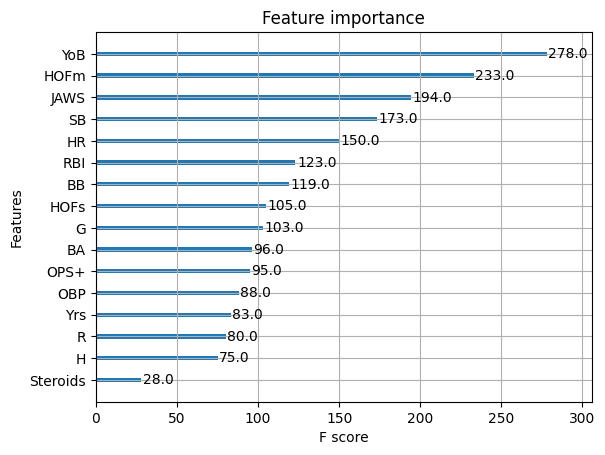

In [39]:
best = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=1, learning_rate=0.2, max_depth=7, n_estimators=100)
best.fit(batterX_train, batterY_train, eval_set=[(batterX_test, batterY_test)])

xgb.plot_importance(best)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# EDA

In [13]:
all_data_clean = pd.read_csv('all_data_clean.csv')
all_data_clean.head()

,YoB,%vote,HOFm,HOFs,Yrs,WAR,WAR7,JAWS,Jpos,G,...,H,HR,RBI,SB,BB,BA,OBP,SLG,OPS,OPS+
0,1,0.934,354,73,19,121.8,67.9,94.9,53.4,2292,...,2654,521,1839,24,2021,0.344,0.482,0.634,1.116,191.0
1,2,0.652,146,43,18,42.0,35.0,38.5,44.2,1449,...,1422,260,1019,38,609,0.283,0.363,0.496,0.859,125.0
2,7,0.619,200,47,17,54.4,39.2,46.8,53.4,1984,...,2471,205,1383,42,437,0.324,0.362,0.505,0.867,134.0
3,6,0.381,89,34,15,63.2,48.9,56.0,55.4,1646,...,1779,68,789,51,796,0.295,0.380,0.415,0.795,120.0
4,9,0.361,71,24,19,16.4,11.2,13.8,44.2,1950,...,1547,51,652,46,556,0.261,0.326,0.337,0.663,83.0


Features are everything but the %vote, which is the target.

In [14]:
X = all_data_clean.drop(['%vote'], axis = 1)
y = all_data_clean.iloc[:, 1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X.copy(),
                                                    y.copy(),
                                                    test_size = 0.2,
                                                    random_state=420)

Note that in XGBoost I don't have to worry about correlated predictors.

/Applications/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


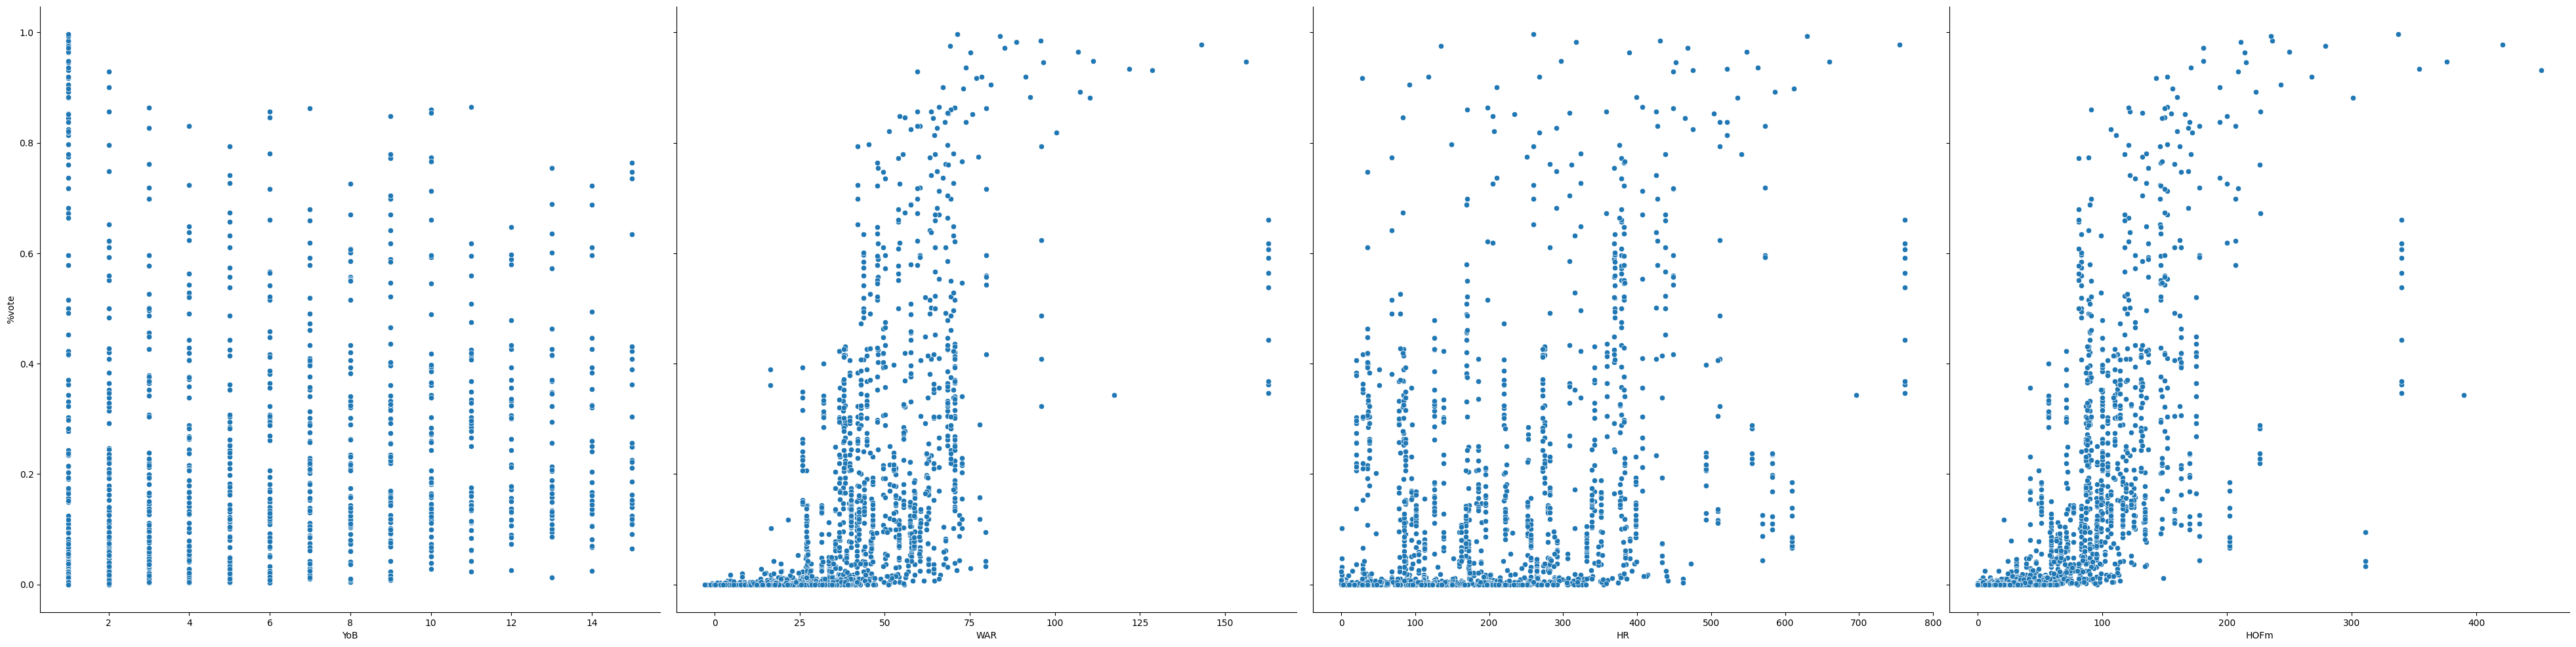

In [19]:
sns.pairplot(all_data_clean,
             x_vars = ['YoB', 'WAR', 'HR', 'HOFm'],
             y_vars = ['%vote'],
             height = 10)